In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import pearsonr
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(-1, 1))
from sklearn.preprocessing import PowerTransformer 
boxcox = PowerTransformer(method='yeo-johnson')
from sklearn.preprocessing import MaxAbsScaler
maxabs = MaxAbsScaler()
from sklearn.preprocessing import normalize as norm


In [20]:
#FOR RF-SCORE

#DELETE ZERO COLUMNS IN VECTORS 

Xrfz = np.load('featsgen/rf_X_all.npy')
Xrf = []
for cols in range(len(Xrfz[0])):
    if ((pd.DataFrame(Xrfz)).sum())[cols] != 0:
        Xrf.append((pd.DataFrame(Xrfz)[cols]))
Xrf = np.array(Xrf).transpose()

Xrfcz= np.load('featsgen/rfc_X_all.npy')
Xrfc = []
for cols in range(len(Xrfcz[0])):
    if ((pd.DataFrame(Xrfcz)).sum())[cols] != 0:
        Xrfc.append((pd.DataFrame(Xrfcz)[cols]))
Xrfc = np.array(Xrfc).transpose()

Xssz = np.load('featsgen/ss_X_all.npy')
Xss = []
for cols in range(len(Xssz[0])):
    if ((pd.DataFrame(Xssz)).sum())[cols] != 0:
        Xss.append((pd.DataFrame(Xssz)[cols]))
Xss = np.array(Xss).transpose()

Xsscz = np.load('featsgen/ssc_X_all.npy')
Xssc = []
for cols in range(len(Xsscz[0])):
    if ((pd.DataFrame(Xsscz)).sum())[cols] != 0:
        Xssc.append((pd.DataFrame(Xsscz)[cols]))
Xssc = np.array(Xssc).transpose()

Xss3z = np.load('featsgen/ss3_X_all.npy')
Xss3 = []
for cols in range(len(Xss3z[0])):
    if ((pd.DataFrame(Xss3z)).sum())[cols] != 0:
        Xss3.append((pd.DataFrame(Xss3z)[cols]))
Xss3 = np.array(Xss3).transpose()

Xbbz = np.load('featsgen/bb_X_all.npy')
Xbb = []
for cols in range(len(Xbbz[0])):
    if ((pd.DataFrame(Xbbz)).sum())[cols] != 0:
        Xbb.append((pd.DataFrame(Xbbz)[cols]))
Xbb = np.array(Xbb).transpose()

Xbbcz = np.load('featsgen/bbc_X_all.npy')
Xbbc = []
for cols in range(len(Xbbcz[0])):
    if ((pd.DataFrame(Xbbcz)).sum())[cols] != 0:
        Xbbc.append((pd.DataFrame(Xbbcz)[cols]))
Xbbc = np.array(Xbbc).transpose()

y = np.load('featsgen/rfc_y_all.npy')

In [21]:
print(len(Xrf[0]))
print(len(Xrfc[0]))
print(len(Xss[0]))
print(len(Xssc[0]))
print(len(Xss3[0]))
print(len(Xbb[0]))
print(len(Xbbc[0]))

46
6
78
9
3
63
7


Xrf


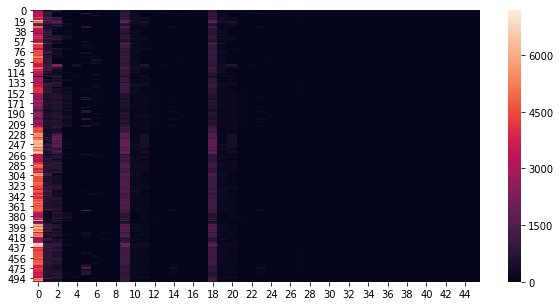

Xss


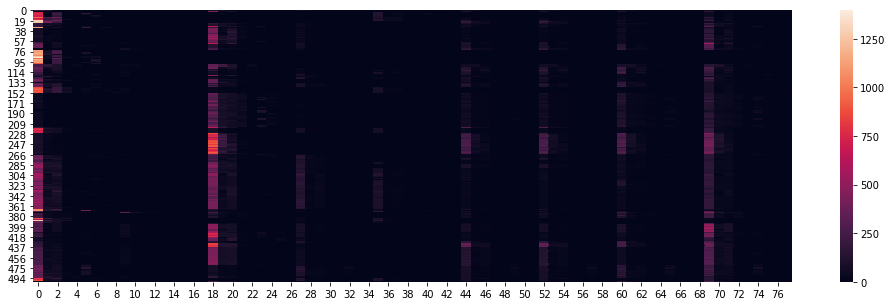

Xbb


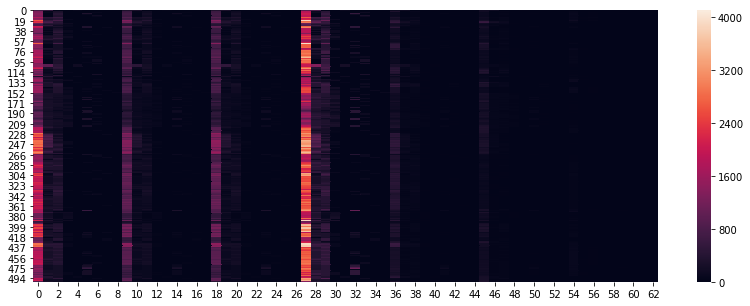

Xrfc


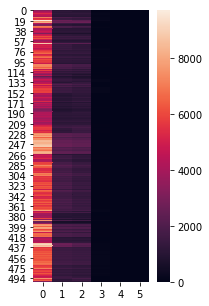

Xssc


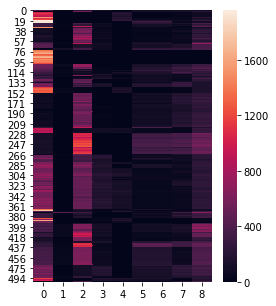

Xss3


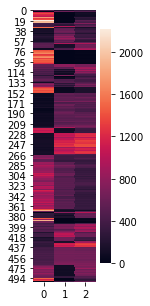

Xbbc


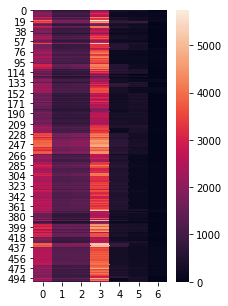

In [22]:

plt.figure(figsize=(10, 5))
print('Xrf')
sns.heatmap(Xrf)
plt.show()

plt.figure(figsize=(17, 5))
print('Xss')
sns.heatmap(Xss)
plt.show()

plt.figure(figsize=(14, 5))
print('Xbb')
sns.heatmap(Xbb)
plt.show()

plt.figure(figsize=(2.6, 5))
print('Xrfc')
sns.heatmap(Xrfc)
plt.show()

plt.figure(figsize=(4, 5))
print('Xssc')
sns.heatmap(Xssc)
plt.show()

plt.figure(figsize=(1.4, 5))
print('Xss3')
sns.heatmap(Xss3)
plt.show()


plt.figure(figsize=(3, 5))
print('Xbbc')
sns.heatmap(Xbbc)
plt.show()


In [944]:
#SCALE ALL
Xrfscaled = scale.fit_transform(Xrf, y)
Xrfcscaled = scale.fit_transform(Xrfc, y)
Xssscaled = scale.fit_transform(Xss, y)
Xsscscaled = scale.fit_transform(Xssc, y)
Xss3scaled = scale.fit_transform(Xss3, y)
Xbbscaled = scale.fit_transform(Xbb, y)
Xbbcscaled = scale.fit_transform(Xbbc, y)

#NORMALIZE ALL
Xrfnorm = norm(Xrf, norm='l1', axis=0)
Xrfcnorm = norm(Xrfc, norm='l1', axis=0)
Xssnorm = norm(Xss, norm='l1', axis=0)
Xsscnorm = norm(Xssc, norm='l1', axis=0)
Xss3norm = norm(Xss3, norm='l1', axis=0)
Xbbnorm = norm(Xbb, norm='l1', axis=0)
Xbbcnorm = norm(Xbbc, norm='l1', axis=0)

In [360]:
#SOME CONCATS

#1st
Xrfcnormsscbb = []
for i in range(len(Xrfc)):
    Xrfcnormsscbb.append(np.concatenate((Xrfcnorm[i], Xssc[i], Xbb[i]), axis=0))
Xrfcnormsscbb = np.array(Xrfcnormsscbb)

#2nd
Xrfsscbbcnorm = []
for i in range(len(Xrf)):
    Xrfsscbbcnorm.append(np.concatenate((Xrf[i], Xssc[i], Xbbcnorm[i]), axis=0))
Xrfsscbbcnorm = np.array(Xrfsscbbcnorm)

#3rd
Xrfssc = []
for i in range(len(Xrf)):
    Xrfssc.append(np.concatenate((Xrf[i], Xssc[i]), axis=0))
Xrfssc = np.array(Xrfssc)

Xrfssc_scaled = scale.fit_transform(Xrfssc, y)

#4th
Xrfcnormssscaledbbc = []
for i in range(len(Xrfc)):
    Xrfcnormssscaledbbc.append(np.concatenate((Xrfcnorm[i], Xssscaled[i], Xbbc[i]), axis=0))
Xrfcnormssscaledbbc = np.array(Xrfcnormssscaledbbc)

#5th
Xrfcnormssbbscaled = []
for i in range(len(Xrfc)):
    Xrfcnormssbbscaled.append(np.concatenate((Xrfcnorm[i], Xss[i], Xbbscaled[i]), axis=0))
Xrfcnormssbbscaled = np.array(Xrfcnormssbbscaled)





#--------
Xrfcnormsscbbscaled = []
for i in range(len(Xrfc)):
    Xrfcnormsscbbscaled.append(np.concatenate((Xrfcnorm[i], Xssc[i], Xbbscaled[i]), axis=0))
Xrfcnormsscbbscaled = np.array(Xrfcnormsscbbscaled)

Xrfssbbc = []
for i in range(len(Xrf)):
    Xrfssbbc.append(np.concatenate((Xrf[i], Xss[i], Xbbc[i]), axis=0))
Xrfssbbc = np.array(Xrfssbbc)

Xrfscaledsscscaledbbcnorm = []
for i in range(len(Xrf)):
    Xrfscaledsscscaledbbcnorm.append(np.concatenate((Xrfscaled[i], Xsscscaled[i], Xbbcnorm[i]), axis=0))
Xrfscaledsscscaledbbcnorm = np.array(Xrfscaledsscscaledbbcnorm)

Xrfscaledssc = []
for i in range(len(Xrf)):
    Xrfscaledssc.append(np.concatenate((Xrfscaled[i], Xssc[i]), axis=0))
Xrfscaledssc = np.array(Xrfscaledssc)

Xrfssnormbb = []
for i in range(len(Xrf)):
    Xrfssnormbb.append(np.concatenate((Xrf[i], Xssnorm[i], Xbb[i]), axis=0))
Xrfssnormbb = np.array(Xrfssnormbb)

#----------------

Xrfscaledsscscaled = []
for i in range(len(Xrf)):
    Xrfscaledsscscaled.append(np.concatenate((Xrfscaled[i], Xsscscaled[i]), axis=0))
Xrfscaledsscscaled = np.array(Xrfscaledsscscaled)



Xrfssc = []
for i in range(len(Xrf)):
    Xrfssc.append(np.concatenate((Xrf[i], Xssc[i]), axis=0))
Xrfssc = np.array(Xrfssc)

Xrfssc_scaled = scale.fit_transform(Xrfssc, y)



Xrfcnormsscscaledbbscaled = []
for i in range(len(Xrfc)):
    Xrfcnormsscscaledbbscaled.append(np.concatenate((Xrfcnorm[i], Xsscscaled[i], Xbbscaled[i]), axis=0))
Xrfcnormsscscaledbbscaled = np.array(Xrfcnormsscscaledbbscaled)


Xrfcssbb = []
for i in range(len(Xrfc)):
    Xrfcssbb.append(np.concatenate((Xrfc[i], Xss[i], Xbb[i]), axis=0))
Xrfcssbb = np.array(Xrfcssbb)


Xrfcnormssbbc = []
for i in range(len(Xrfc)):
    Xrfcnormssbbc.append(np.concatenate((Xrfcnorm[i], Xss[i], Xbbc[i]), axis=0))
Xrfcnormssbbc = np.array(Xrfcnormssbbc)


Xssscaledbbscaled = []
for i in range(len(Xrf)):
    Xssscaledbbscaled.append(np.concatenate((Xssscaled[i], Xbbscaled[i]), axis=0))
Xssscaledbbscaled = np.array(Xssscaledbbscaled)

Xrfcnormssc = []
for i in range(len(Xrfc)):
    Xrfcnormssc.append(np.concatenate((Xrfcnorm[i], Xssc[i]), axis=0))
Xrfcnormssc = np.array(Xrfcnormssc)

Xss3bb3 = []
for i in range(len(Xrf)):
    Xss3bb3.append(np.concatenate((Xss3[i], Xbb[i]), axis=0))
Xss3bb3 = np.array(Xss3bb3)

Xrfscaledsscnorm = []
for i in range(len(Xrf)):
    Xrfscaledsscnorm.append(np.concatenate((Xrfscaled[i], Xsscnorm[i]), axis=0))
Xrfscaledsscnorm = np.array(Xrfscaledsscnorm)

Xrfsscbb = []
for i in range(len(Xrf)):
    Xrfsscbb.append(np.concatenate((Xrf[i], Xssc[i], Xbb[i]), axis=0))
Xrfsscbb = np.array(Xrfsscbb)

Xrfcsscbbc = []
for i in range(len(Xrfc)):
    Xrfcsscbbc.append(np.concatenate((Xrfc[i], Xssc[i], Xbbc[i]), axis=0))
Xrfcsscbbc = np.array(Xrfcsscbbc)

#----------------

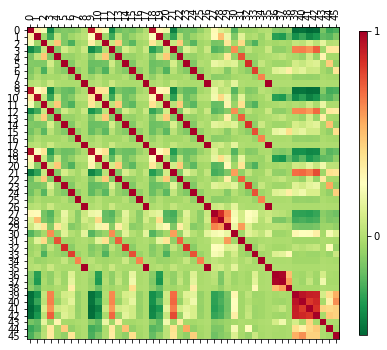


SAME, BUT CLUSTERED


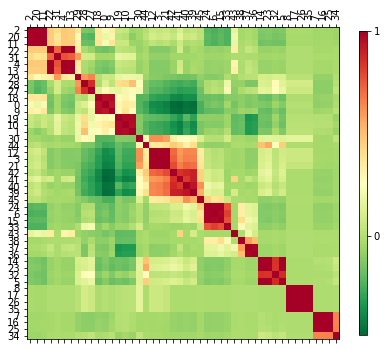


SAME, BUT UNCORRELATED


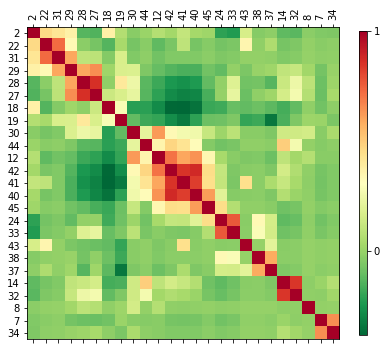


SAME, BUT ZEROS DROPPED


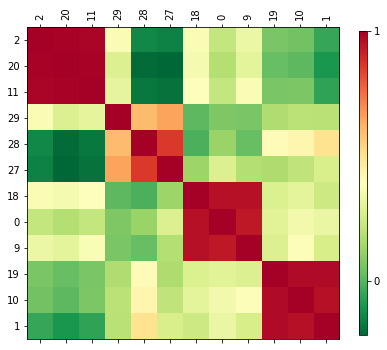

In [23]:
#CORRELATION MATRIX

df = pd.DataFrame(Xrf)

def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn_r', )
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

plot_corr(df, size=7)
plt.show()
    

import scipy
import scipy.cluster.hierarchy as sch

cluster_th = 4

X = df.corr().values
d = sch.distance.pdist(X)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')

columns = [df.columns.tolist()[i] for i in list(np.argsort(ind))]
df = df.reindex(columns, axis=1)

unique, counts = np.unique(ind, return_counts=True)
counts = dict(zip(unique, counts))

i = 0
j = 0
columns = []
for cluster_l1 in set(sorted(ind)):
    j += counts[cluster_l1]
    sub = df[df.columns.values[i:j]]
    if counts[cluster_l1]>cluster_th:        
        X = sub.corr().values
        d = sch.distance.pdist(X)
        L = sch.linkage(d, method='complete')
        ind = sch.fcluster(L, 0.5*d.max(), 'distance')
        col = [sub.columns.tolist()[i] for i in list((np.argsort(ind)))]
        sub = sub.reindex(col, axis=1)
    cols = sub.columns.tolist()
    columns.extend(cols)
    i = j
df = df.reindex(columns, axis=1)


print('\nSAME, BUT CLUSTERED')
plot_corr(df, size=7)
plt.show()

#DELETE HIGHLY CORRELATED FEATURES AND PLT THE MATRIX AGAIN


# Create correlation matrix
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

df_uncor = df.drop(df[to_drop], axis=1)

print('\nSAME, BUT UNCORRELATED')
plot_corr(df_uncor, size=7)
plt.show()


#DELETE MANY ZERO COLUMNS AND PLT THE MATRIX AGAIN

many_zeros=[]
for i in range(len(df.columns)):
    if i not in [0, 1, 2, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
        many_zeros.append(i)
df_dropped = df.drop(df.iloc[:, many_zeros], axis=1)
print('\nSAME, BUT ZEROS DROPPED')
plot_corr(df_dropped, size=7)
plt.show()


In [24]:
print((df).shape)
print(df_uncor.shape)
print(df_dropped.shape)

(501, 46)
(501, 25)
(501, 12)


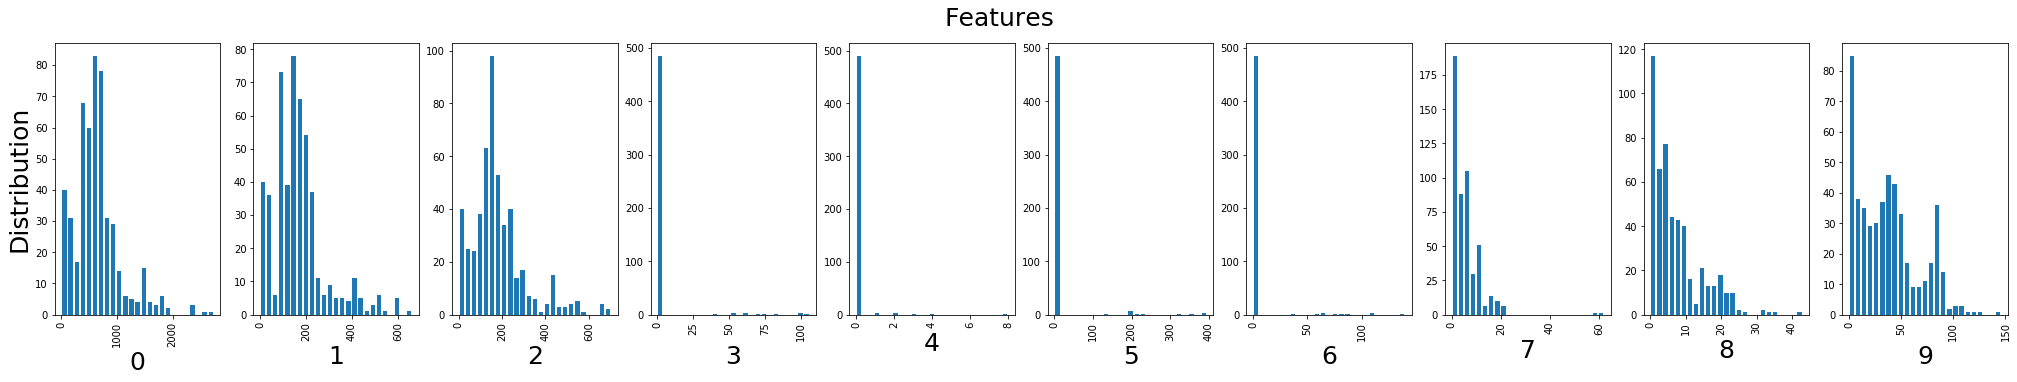

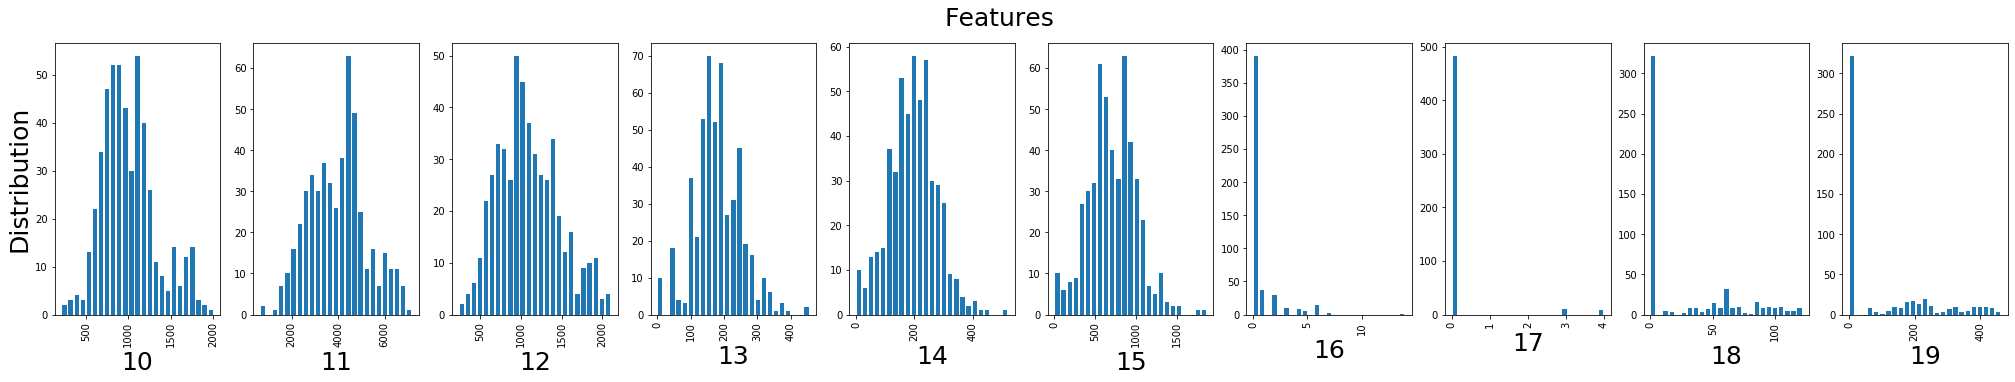

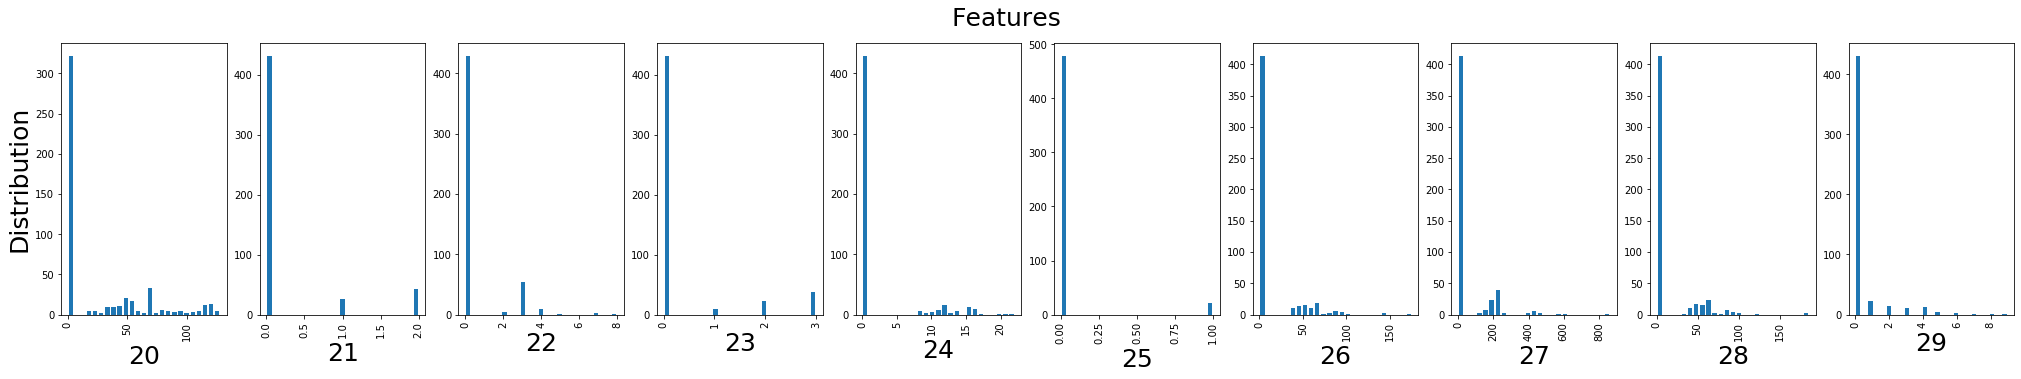

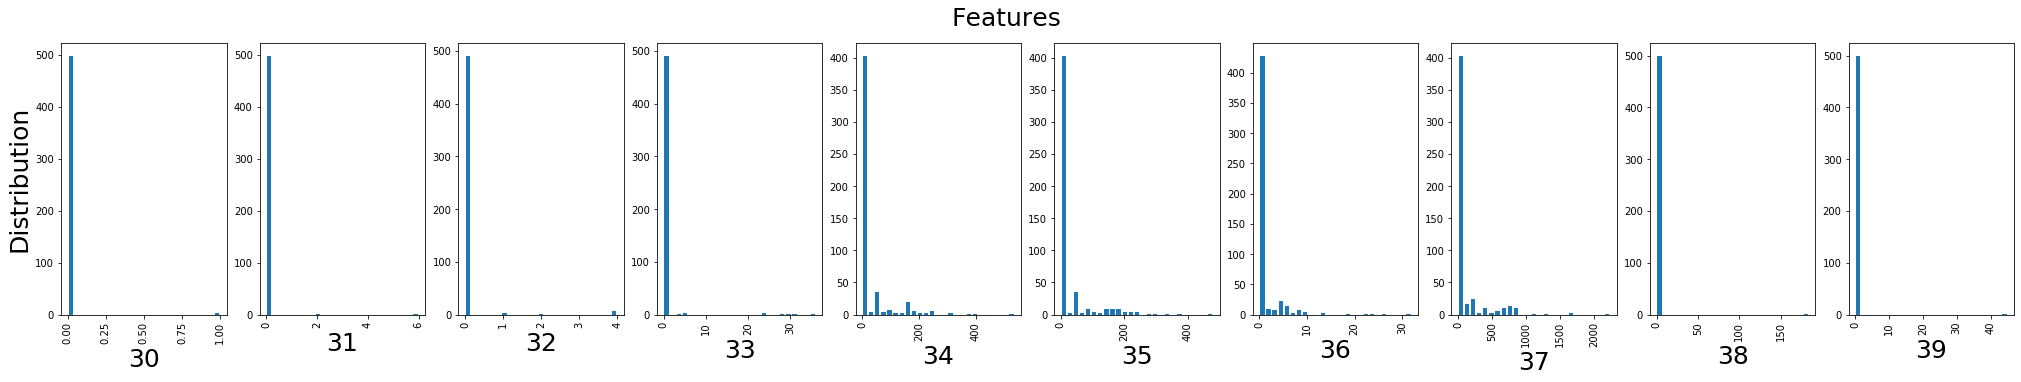

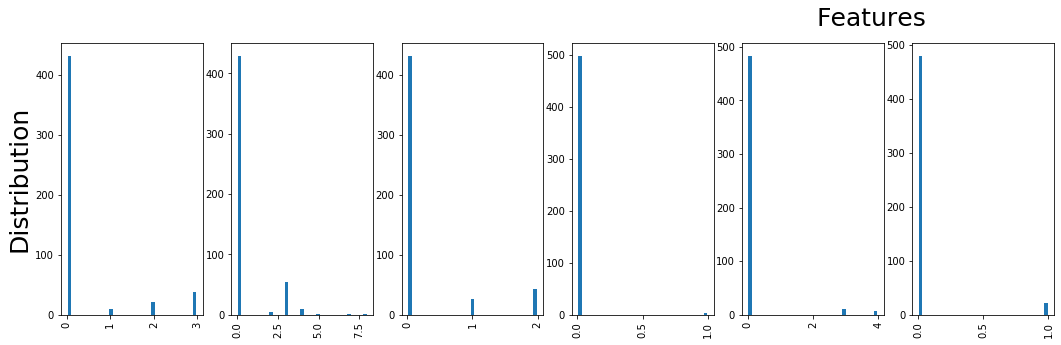

In [25]:
#PLOT FEATURES
df = df


groups1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
groups2 = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
groups3 = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
groups4 = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

plt.figure(figsize=(35,5))

subplot_n = 1
for group in groups1:
    if group == groups1[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups1), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

plt.figure(figsize=(35,5))
subplot_n = 1
for group in groups2:
    if group == groups2[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups2), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

plt.figure(figsize=(35,5))
subplot_n = 1
for group in groups3:
    if group == groups3[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups3), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

plt.figure(figsize=(35,5))
subplot_n = 1
for group in groups4:
    if group == groups4[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups4), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

groups5 = [40, 41, 42, 43, 44, 45]

plt.figure(figsize=(30,5))

subplot_n = 1
for group in groups5:
    if group == groups5[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df[group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups1), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    if group == 0:
        plt.xlabel('log(0)', fontsize=25)
    elif group == 1:
        plt.xlabel('log(1)', fontsize=25)
    elif group == 2:
        plt.xlabel('log(2)', fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

In [809]:
np.log(0.1)

-2.3025850929940455

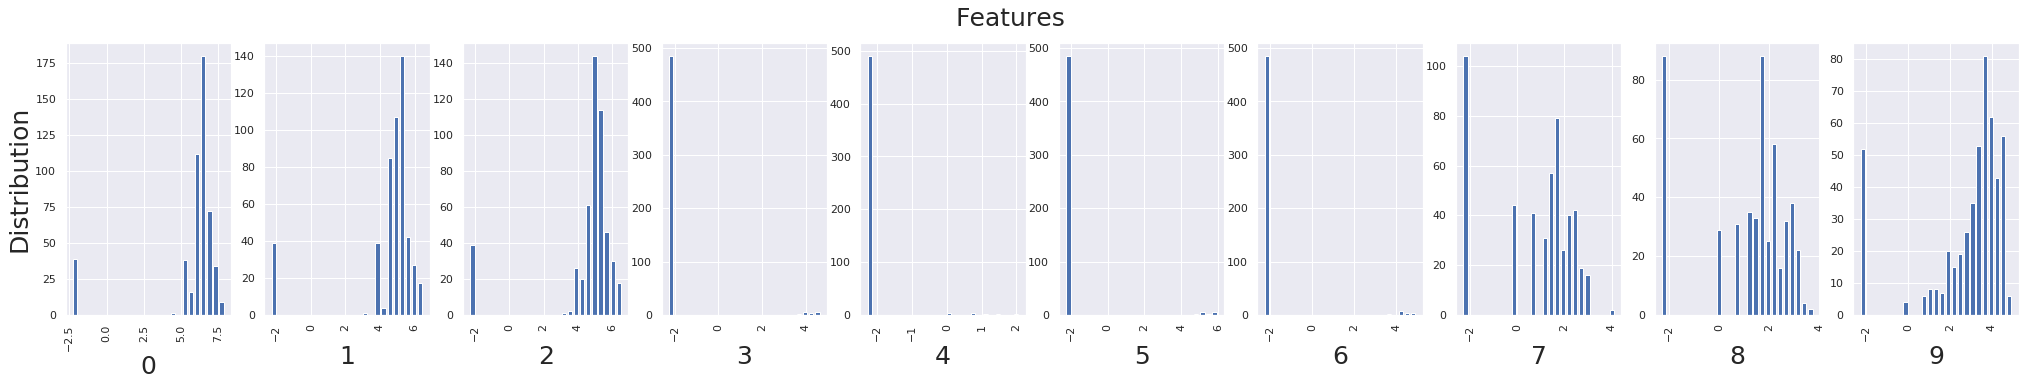

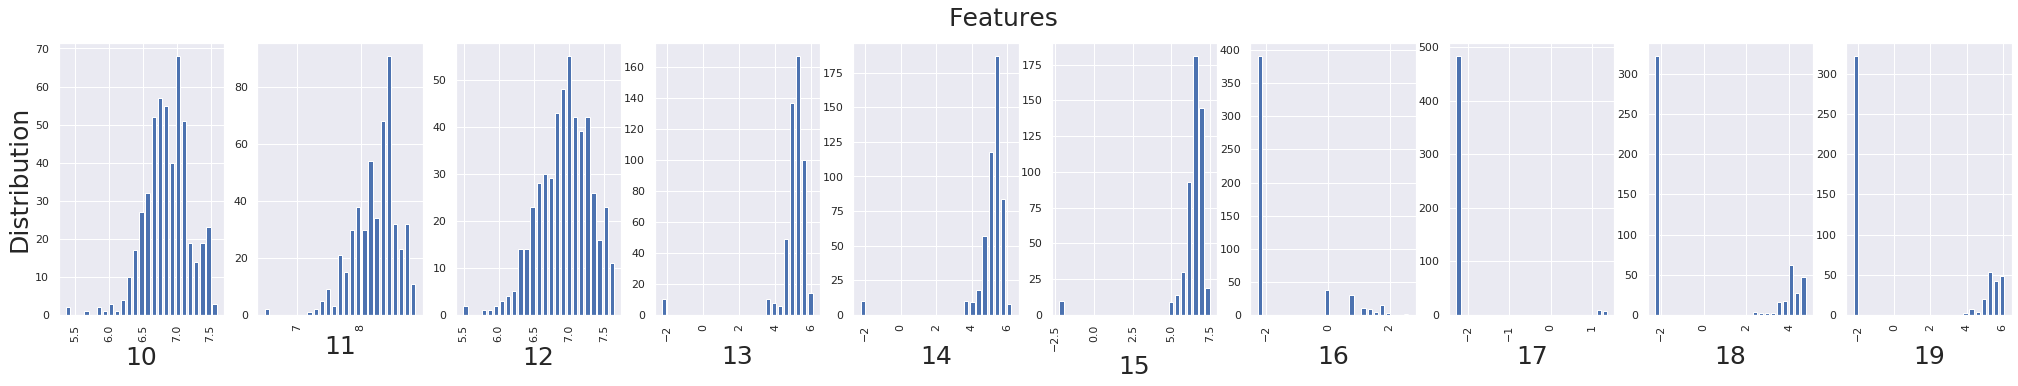

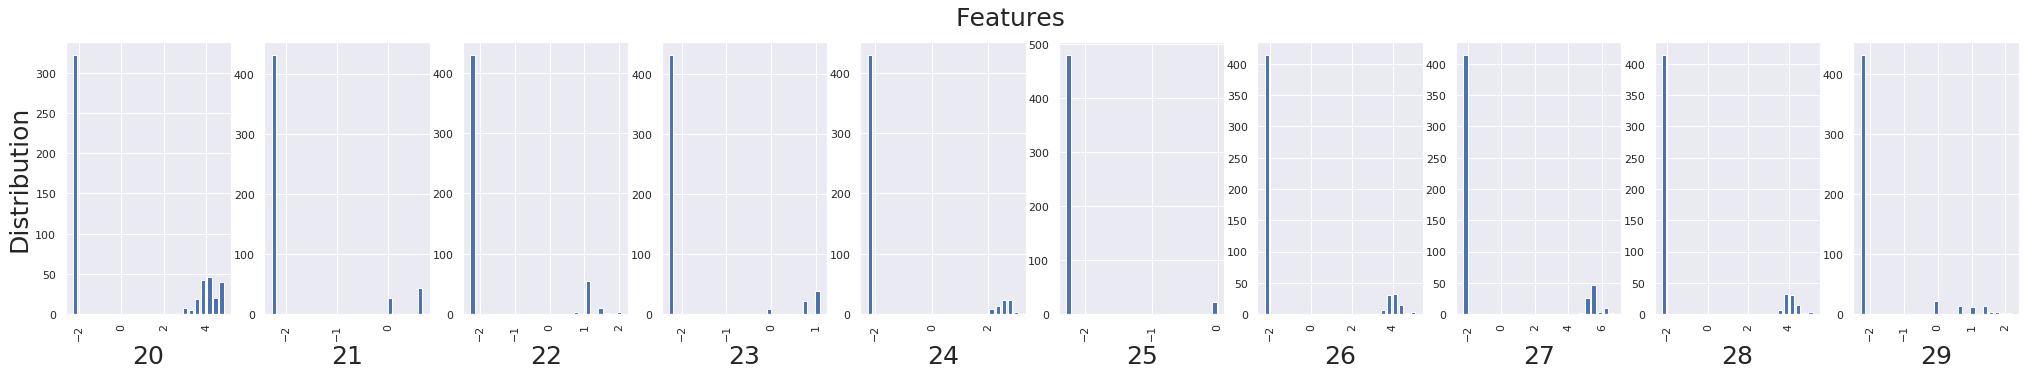

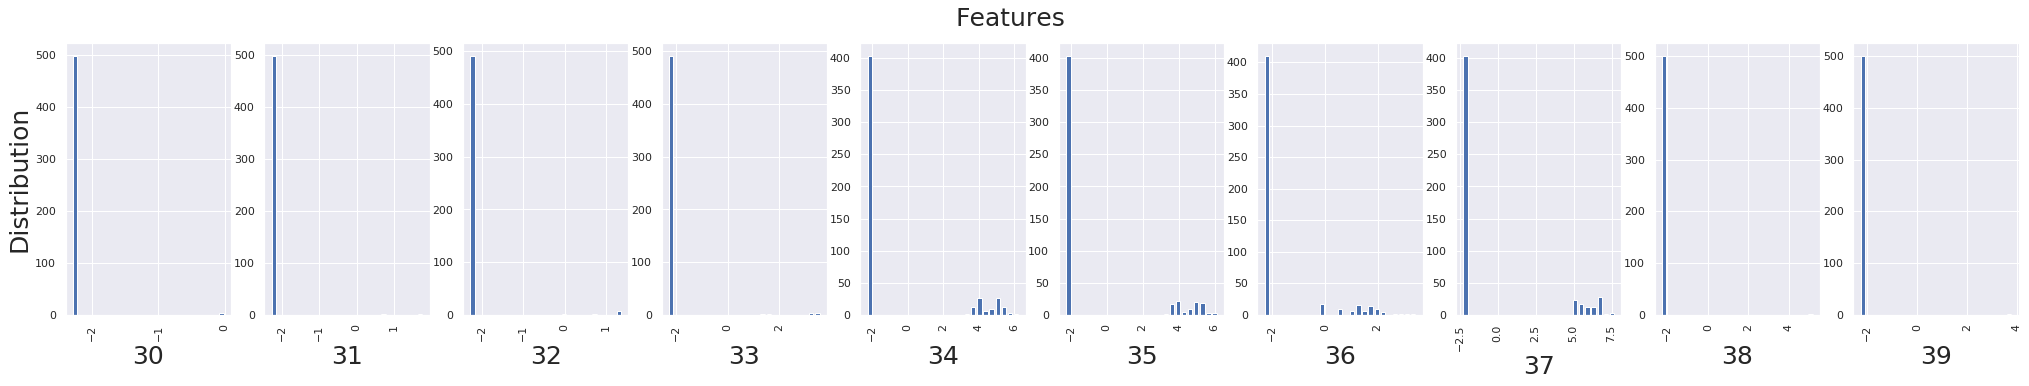

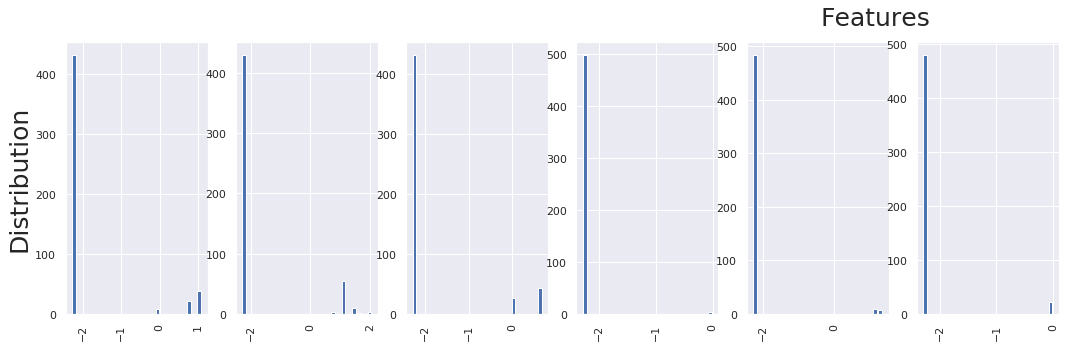

In [810]:
#PLOT FEATURES LOG ALL

df0 = df.replace(0, 0.1)
df = np.log(df0)

df = df


groups1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
groups2 = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
groups3 = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
groups4 = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

plt.figure(figsize=(35,5))

subplot_n = 1
for group in groups1:
    if group == groups1[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups1), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

plt.figure(figsize=(35,5))
subplot_n = 1
for group in groups2:
    if group == groups2[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups2), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

plt.figure(figsize=(35,5))
subplot_n = 1
for group in groups3:
    if group == groups3[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups3), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

plt.figure(figsize=(35,5))
subplot_n = 1
for group in groups4:
    if group == groups4[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups4), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

groups5 = [40, 41, 42, 43, 44, 45]

plt.figure(figsize=(30,5))

subplot_n = 1
for group in groups5:
    if group == groups5[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df[group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups1), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    if group == 0:
        plt.xlabel('log(0)', fontsize=25)
    elif group == 1:
        plt.xlabel('log(1)', fontsize=25)
    elif group == 2:
        plt.xlabel('log(2)', fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

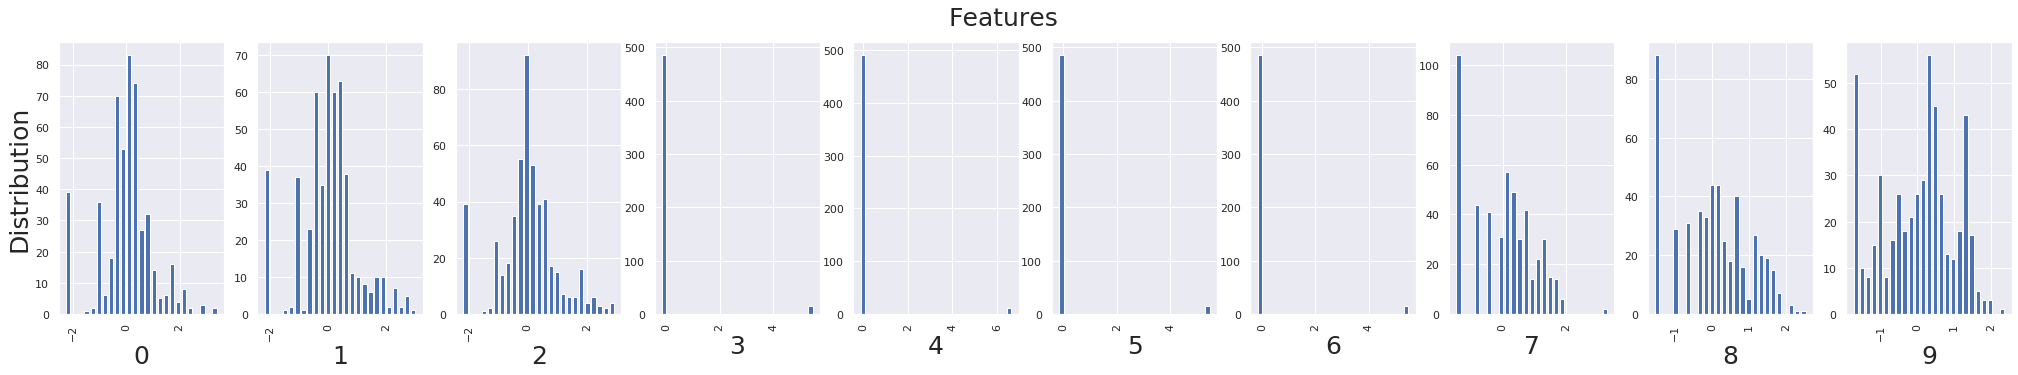

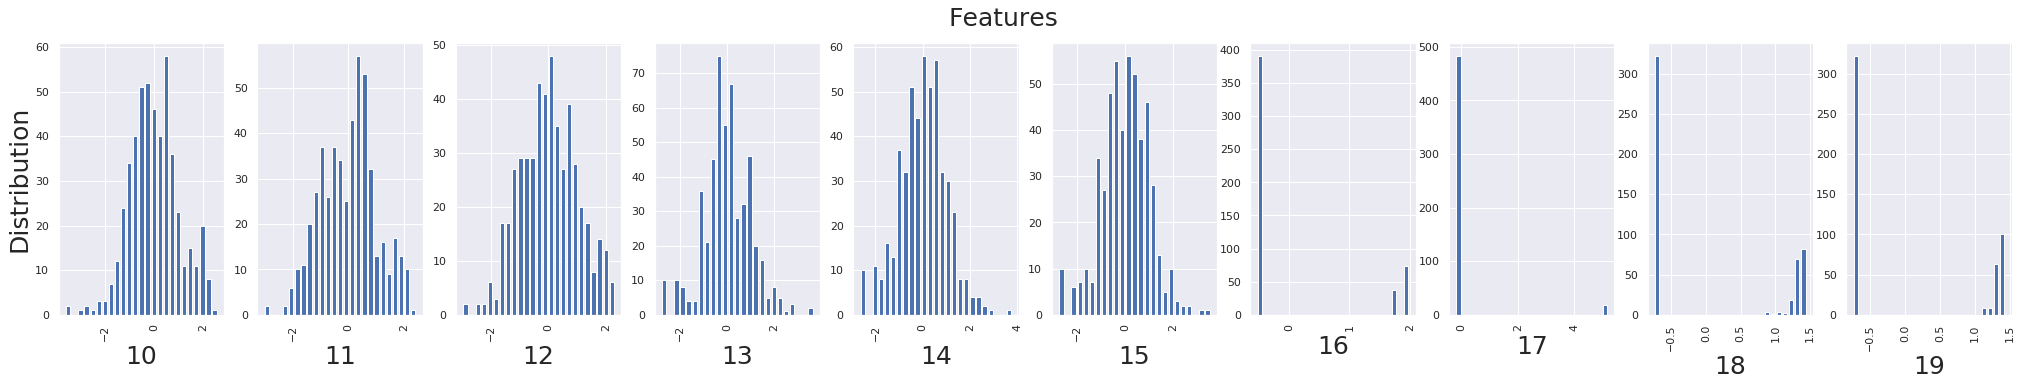

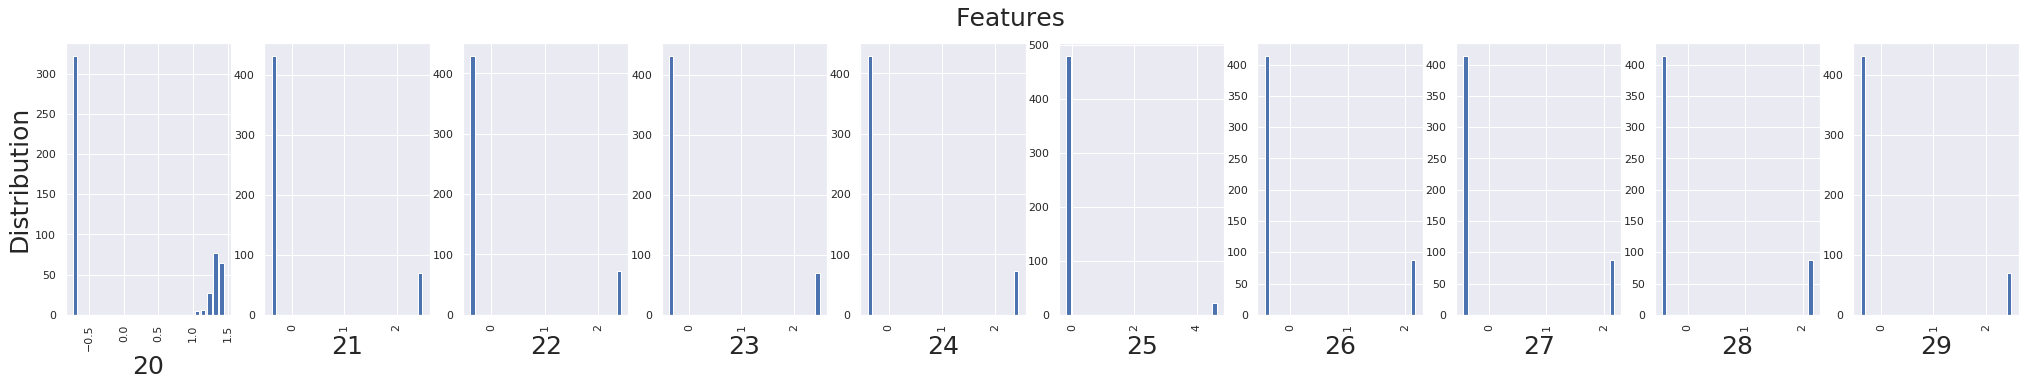

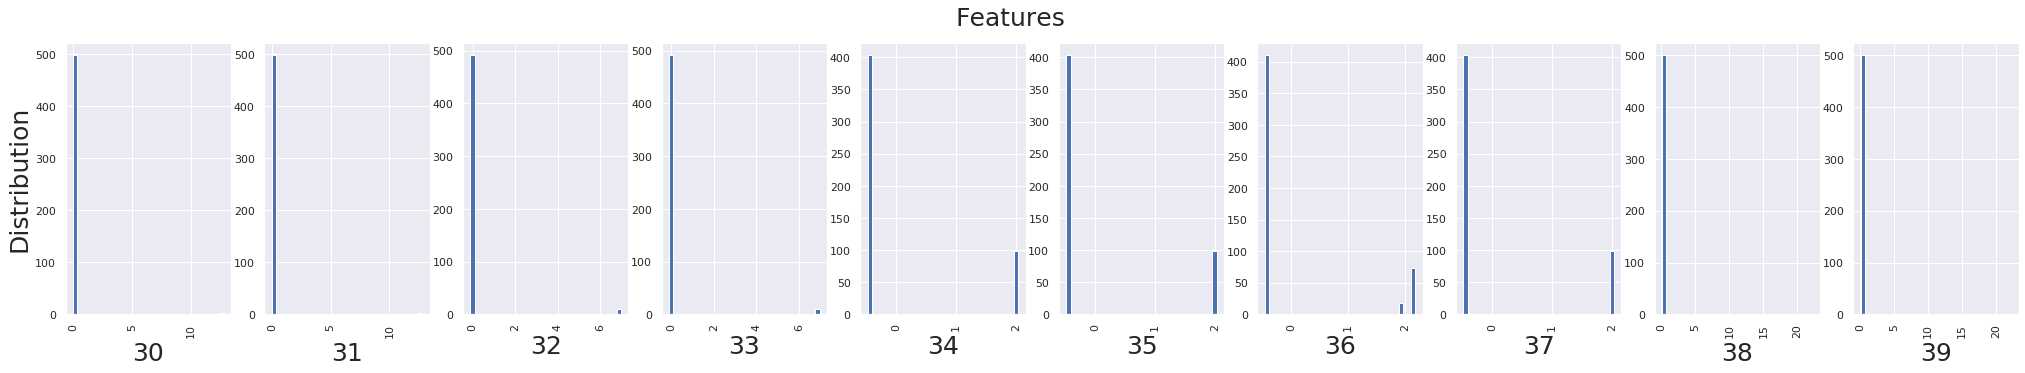

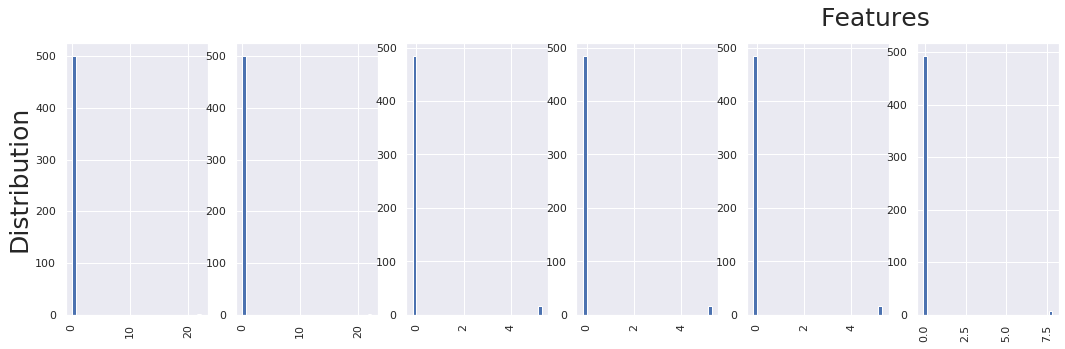

In [968]:
#PLOT FEATURES POWER TRANSFORM ALL


df = boxcox.fit_transform(np.array(df))


df = pd.DataFrame(df)


groups1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
groups2 = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
groups3 = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
groups4 = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

plt.figure(figsize=(35,5))

subplot_n = 1
for group in groups1:
    if group == groups1[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups1), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

plt.figure(figsize=(35,5))
subplot_n = 1
for group in groups2:
    if group == groups2[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups2), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

plt.figure(figsize=(35,5))
subplot_n = 1
for group in groups3:
    if group == groups3[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups3), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

plt.figure(figsize=(35,5))
subplot_n = 1
for group in groups4:
    if group == groups4[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups4), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

groups5 = [40, 41, 42, 43, 44, 45]

plt.figure(figsize=(30,5))

subplot_n = 1
for group in groups5:
    if group == groups5[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df[group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups1), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    if group == 0:
        plt.xlabel('log(0)', fontsize=25)
    elif group == 1:
        plt.xlabel('log(1)', fontsize=25)
    elif group == 2:
        plt.xlabel('log(2)', fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

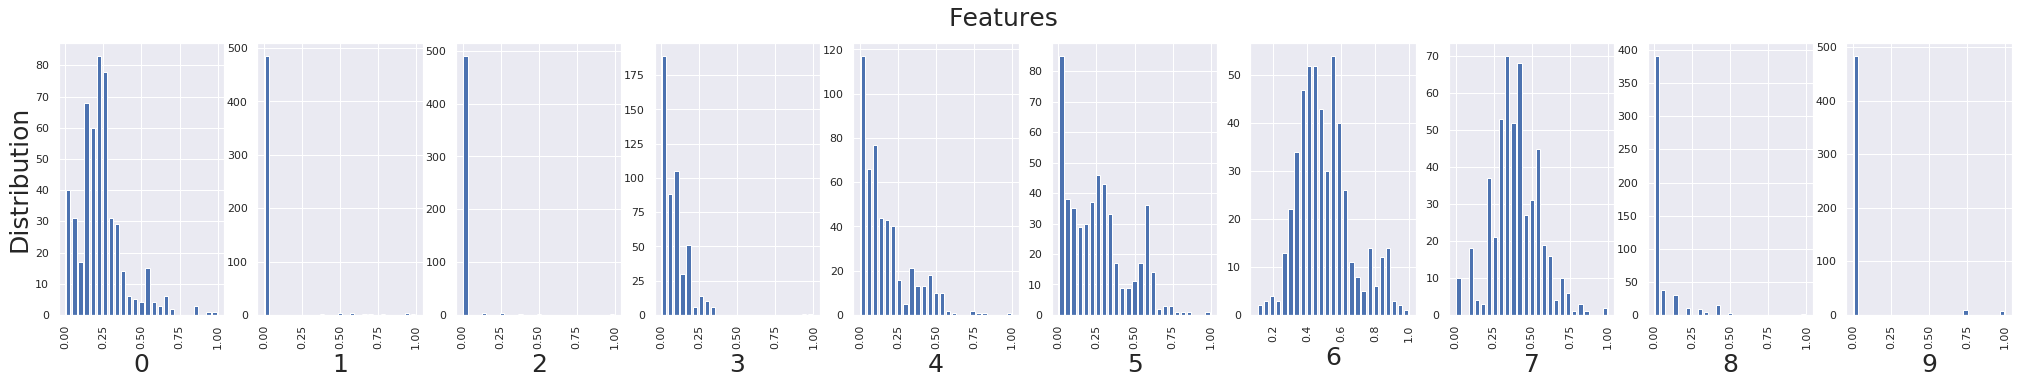

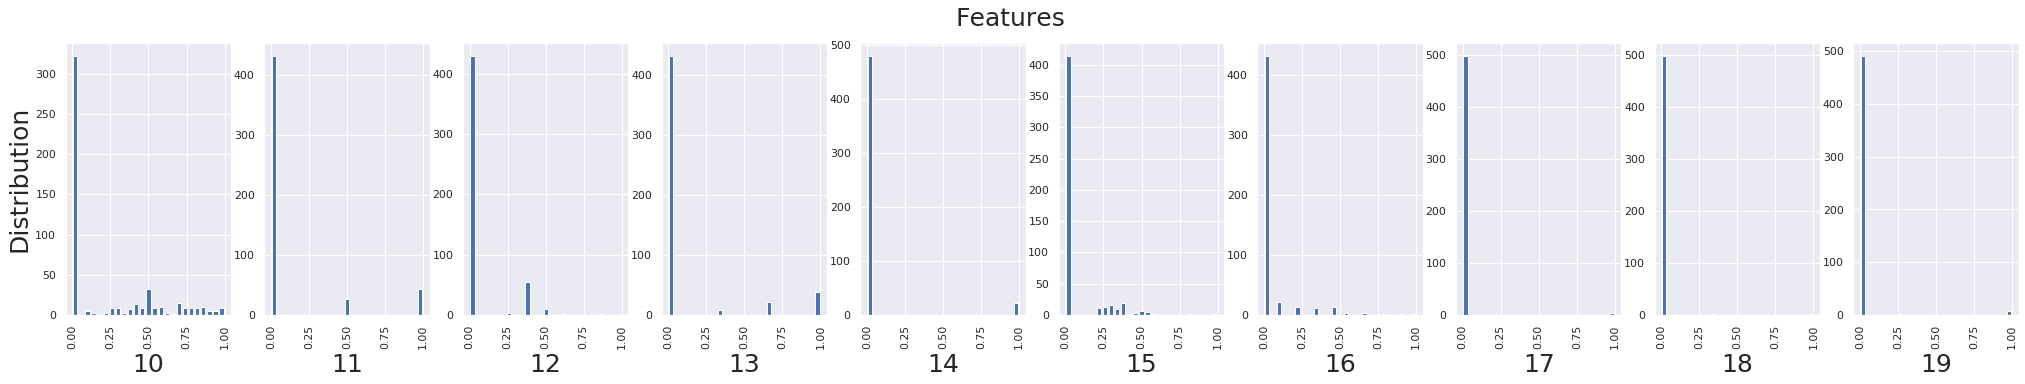

IndexError: single positional indexer is out-of-bounds

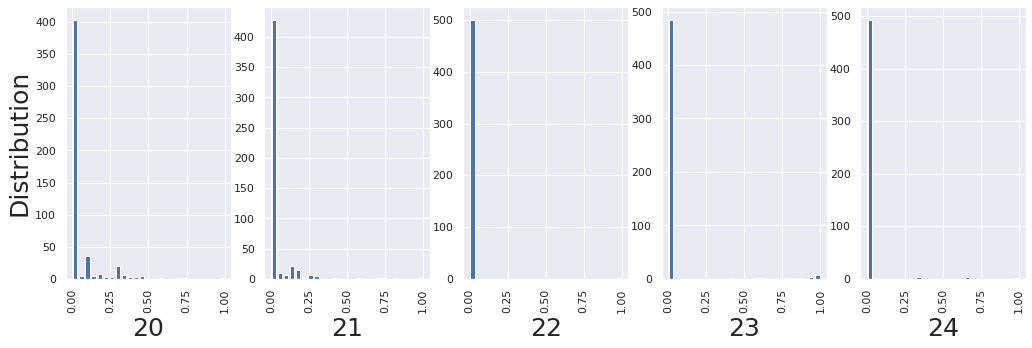

In [242]:
#PLOT FEATURES MAXABS TRANSFORM ALL


df = pd.DataFrame(maxabs.fit_transform(np.array(df_uncor)))




groups1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
groups2 = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
groups3 = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
groups4 = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

plt.figure(figsize=(35,5))

subplot_n = 1
for group in groups1:
    if group == groups1[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups1), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

plt.figure(figsize=(35,5))
subplot_n = 1
for group in groups2:
    if group == groups2[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups2), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

plt.figure(figsize=(35,5))
subplot_n = 1
for group in groups3:
    if group == groups3[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups3), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

plt.figure(figsize=(35,5))
subplot_n = 1
for group in groups4:
    if group == groups4[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups4), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

groups5 = [40, 41, 42, 43, 44, 45]

plt.figure(figsize=(30,5))

subplot_n = 1
for group in groups5:
    if group == groups5[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df[group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups1), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    if group == 0:
        plt.xlabel('log(0)', fontsize=25)
    elif group == 1:
        plt.xlabel('log(1)', fontsize=25)
    elif group == 2:
        plt.xlabel('log(2)', fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

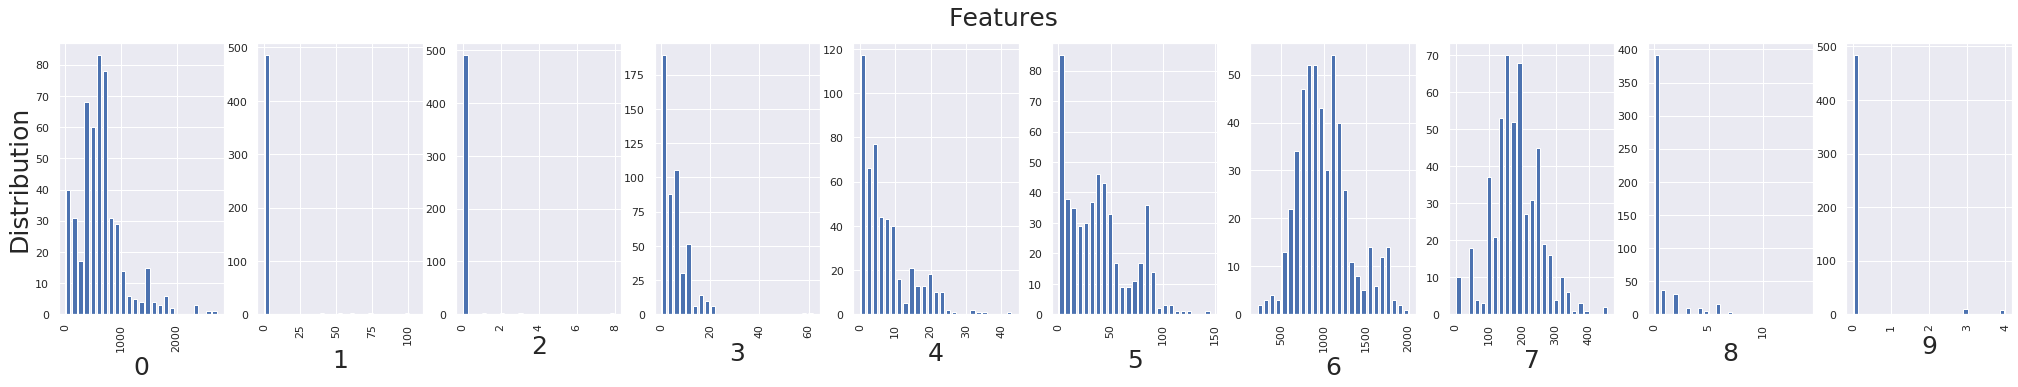

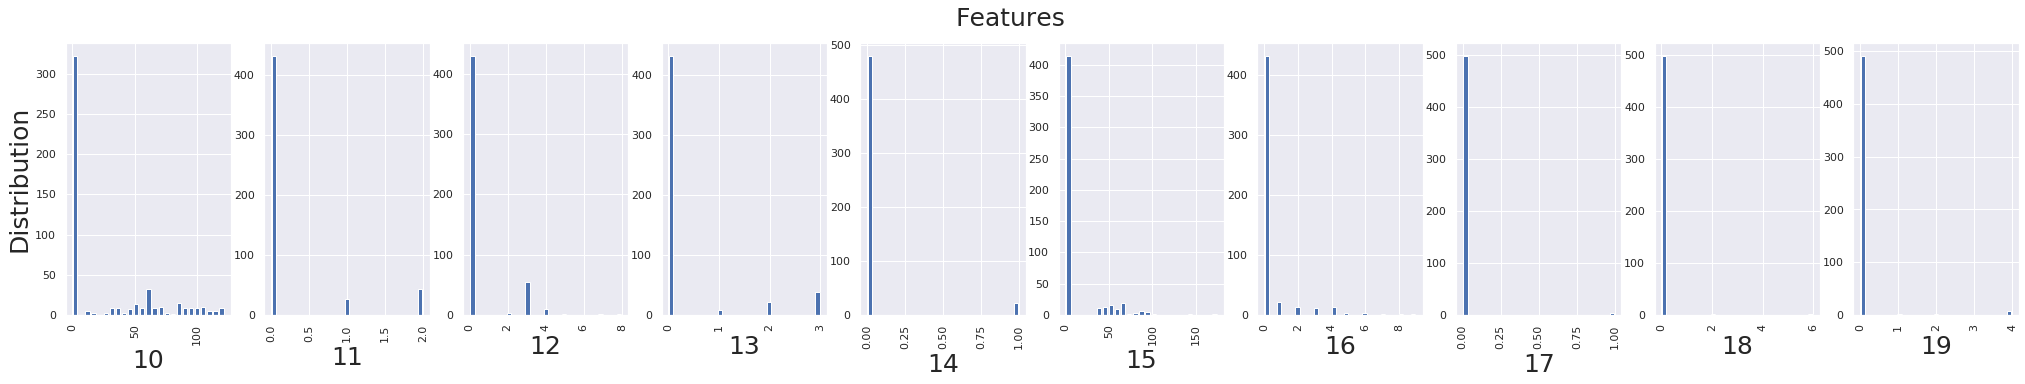

In [240]:
#PLOT FEATURES
df = df_uncor


groups1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
groups2 = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

plt.figure(figsize=(35,5))

subplot_n = 1
for group in groups1:
    if group == groups1[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups1), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

plt.figure(figsize=(35,5))
subplot_n = 1
for group in groups2:
    if group == groups2[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups2), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()


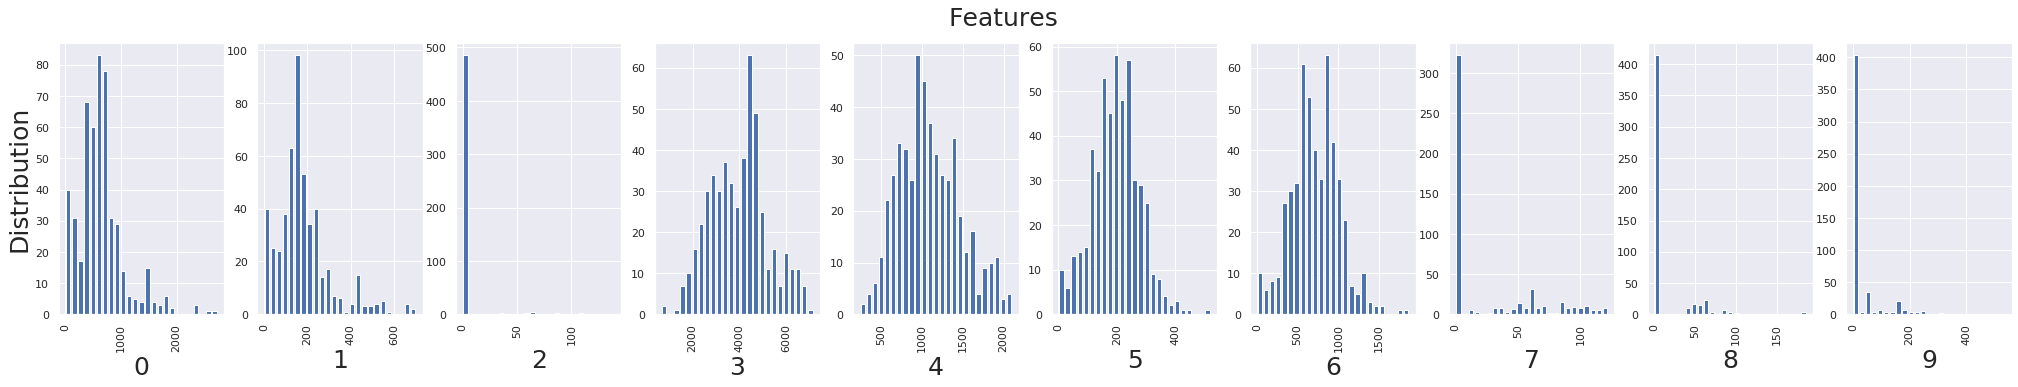

IndexError: single positional indexer is out-of-bounds

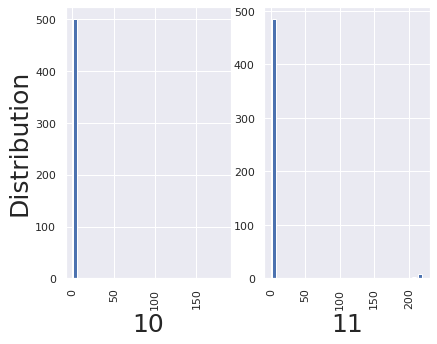

In [45]:
#PLOT FEATURES
df = df_dropped


groups1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
groups2 = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

plt.figure(figsize=(35,5))

subplot_n = 1
for group in groups1:
    if group == groups1[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups1), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()

plt.figure(figsize=(35,5))
subplot_n = 1
for group in groups2:
    if group == groups2[1]:
        plt.ylabel('Distribution',fontsize=25)
    hist, bins = np.histogram(df.iloc[:, group], bins=25)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.subplot(1,len(groups2), subplot_n)
    plt.bar(center, hist, align='center', width=width)
    plt.xticks(rotation=90)
    plt.xlabel(group, fontsize=25)
    subplot_n += 1
plt.suptitle('Features',fontsize=25)
plt.show()


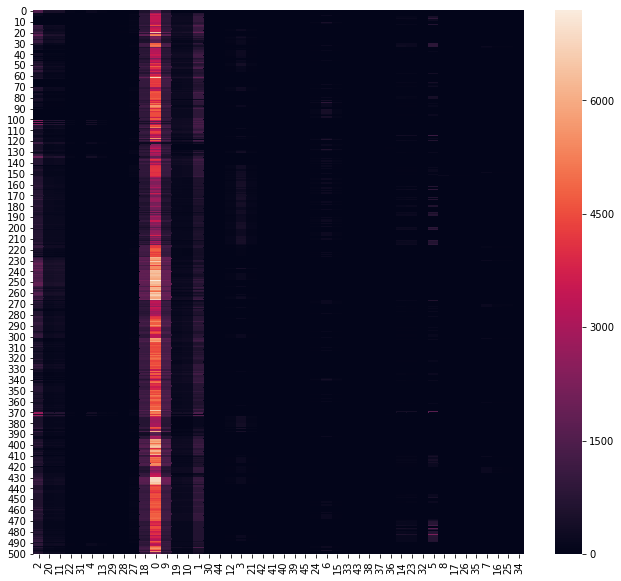

In [6]:
plt.figure(figsize=(11,10))
sns.heatmap(df)
plt.show()


NEW BATCH

VALIDATION
R2:   0.5478835616816241
MAE:   0.6384363629546016
RMSE:   0.8709307127972516
Pearsons:   0.7458607218115623
Q2:   0.551083095666264
ADJUSTED R2:   0.5020744071383525


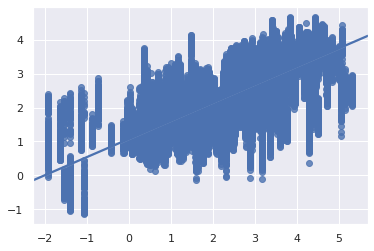

TEST HSP90
R2:   -1.04358916292031
MAE:   1.0304616329853653
RMSE:   1.24797754131106
Pearsons:   0.5033179042633036
Q2:   0.1984697301237066
ADJUSTED R2:   -1.250648857841751


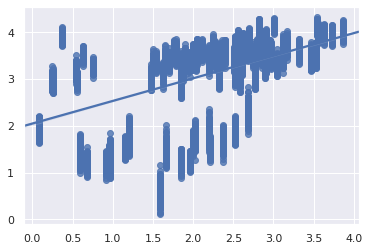

TEST HIV1
R2:   -1.7454981993252126
MAE:   1.8270905036754457
RMSE:   2.3082932699582126
Pearsons:   0.08303341614730061
Q2:   -2.236434716051063
ADJUSTED R2:   -2.023676430974904


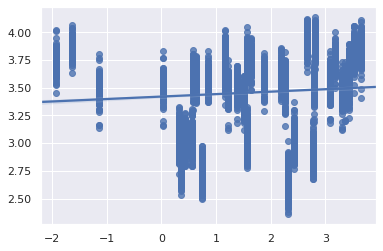

TEST HCA
R2:   -1.6587175953556388
MAE:   0.9817454098238716
RMSE:   1.1784741370996117
Pearsons:   -0.03872398236664409
Q2:   0.164572790808421
ADJUSTED R2:   -1.9281030785855053


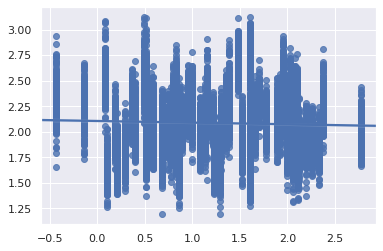

TEST LEAKY
R2:   0.5587815839510942
MAE:   0.5829463132975261
RMSE:   0.7953793993750888
Pearsons:   0.7651518753754327
Q2:   0.6434409212830653
ADJUSTED R2:   0.5140766343073725


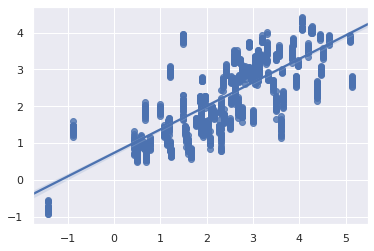


NEW BATCH

VALIDATION
R2:   0.5488502420931008
MAE:   0.6386420496346423
RMSE:   0.8704204127729659
Pearsons:   0.7468155194869346
Q2:   0.5517755804722376
ADJUSTED R2:   0.5377563955871936


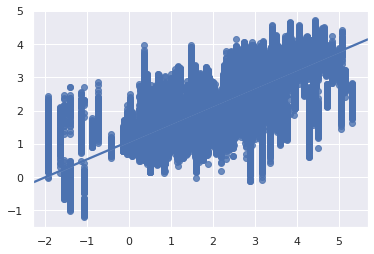

TEST HSP90
R2:   -0.9253056383325982
MAE:   0.9864368509901869
RMSE:   1.2113675935185508
Pearsons:   0.5026279415781063
Q2:   0.244854300803037
ADJUSTED R2:   -0.9726492196030718


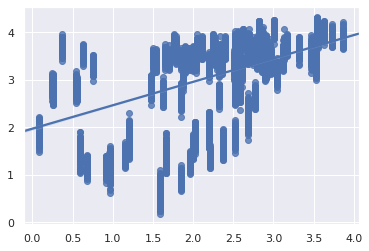

TEST HIV1
R2:   -1.7582804066061504
MAE:   1.834408173797187
RMSE:   2.313648384354319
Pearsons:   0.08085749046619654
Q2:   -2.2515490873569637
ADJUSTED R2:   -1.826106973981712


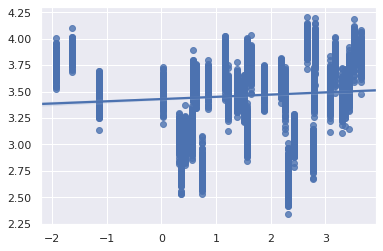

TEST HCA
R2:   -0.39187260600667473
MAE:   0.7370933355203505
RMSE:   0.8546285328630333
Pearsons:   0.05918029623485971
Q2:   0.5626303765123217
ADJUSTED R2:   -0.426098981564216


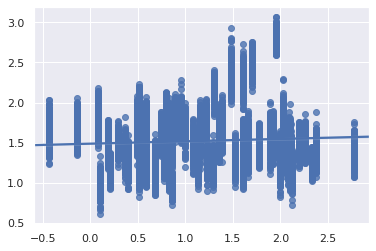

TEST LEAKY
R2:   0.5874889040957586
MAE:   0.5687942695658014
RMSE:   0.7690933872674776
Pearsons:   0.7788680787266686
Q2:   0.6666364255079886
ADJUSTED R2:   0.5773451886227035


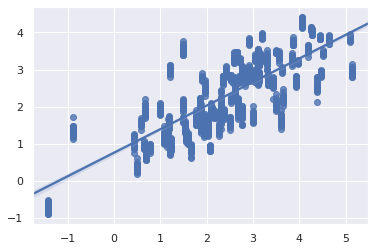


NEW BATCH

VALIDATION
R2:   0.5220137483826689
MAE:   0.6510269443138827
RMSE:   0.8962266201857488
Pearsons:   0.7276689409052799
Q2:   0.5247932162384338
ADJUSTED R2:   0.4968565772449146


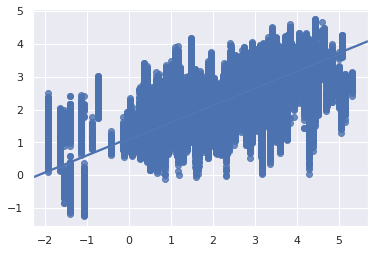

TEST HSP90
R2:   -1.1114857664601892
MAE:   1.0395669560732497
RMSE:   1.268729545169702
Pearsons:   0.4749268569697769
Q2:   0.17182448322725588
ADJUSTED R2:   -1.222616596273883


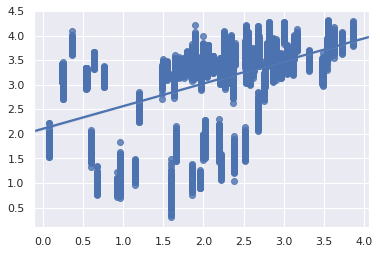

TEST HIV1
R2:   -1.3303963230004328
MAE:   1.6713039454724818
RMSE:   2.1265616038626525
Pearsons:   -0.09696515422115694
Q2:   -1.747164024882573
ADJUSTED R2:   -1.4530487610530871


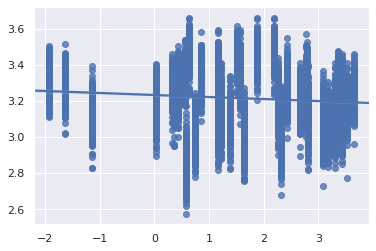

TEST HCA
R2:   -1.439447938516326
MAE:   0.9521921916844522
RMSE:   1.1292906442696806
Pearsons:   0.23568388718638167
Q2:   0.23346540206813804
ADJUSTED R2:   -1.5678399352803432


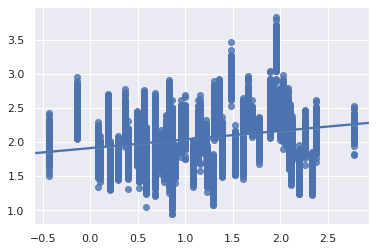

TEST LEAKY
R2:   0.518569805483921
MAE:   0.6011136175189431
RMSE:   0.8308028496072313
Pearsons:   0.7448393199077434
Q2:   0.6109472166178386
ADJUSTED R2:   0.49323137419360097


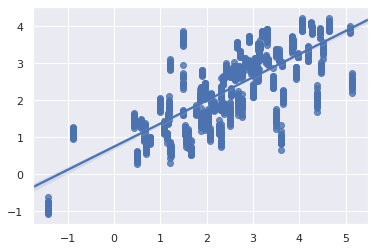


NEW BATCH

VALIDATION
R2:   0.5477623959839988
MAE:   0.6377158161720982
RMSE:   0.8713609327528894
Pearsons:   0.7457855027236232
Q2:   0.550991975129782
ADJUSTED R2:   0.5019409647400868


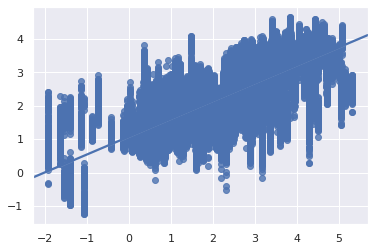

TEST HSP90
R2:   -1.0280996098145452
MAE:   1.0229107556328676
RMSE:   1.243349256361201
Pearsons:   0.5018910741755381
Q2:   0.20454844002205838
ADJUSTED R2:   -1.2335898786503803


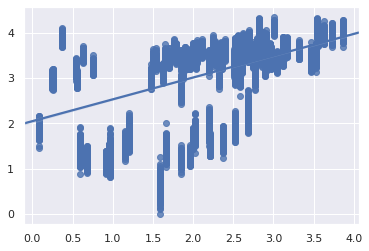

TEST HIV1
R2:   -1.7337544320929725
MAE:   1.824335493147904
RMSE:   2.303320376935484
Pearsons:   0.09483265729497223
Q2:   -2.222619482071835
ADJUSTED R2:   -2.0107427666222164


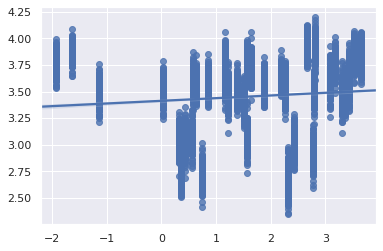

TEST HCA
R2:   -1.61789044976276
MAE:   0.9727724810955795
RMSE:   1.1695744769179641
Pearsons:   -0.0447926151560124
Q2:   0.17738516629426956
ADJUSTED R2:   -1.8831392618532599


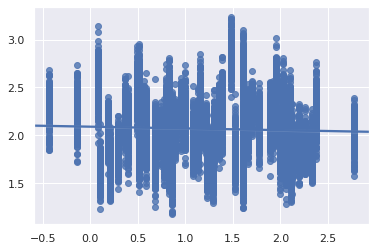

TEST LEAKY
R2:   0.5623144271884903
MAE:   0.5793307397259976
RMSE:   0.7922036887568549
Pearsons:   0.7661722977047856
Q2:   0.6462917654255057
ADJUSTED R2:   0.5179674308243286


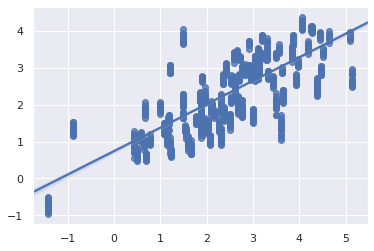


NEW BATCH

VALIDATION
R2:   0.5467522123257913
MAE:   0.6392440005699639
RMSE:   0.8719183427756146
Pearsons:   0.7449696516635672
Q2:   0.5504471973445971
ADJUSTED R2:   0.5356067749239665


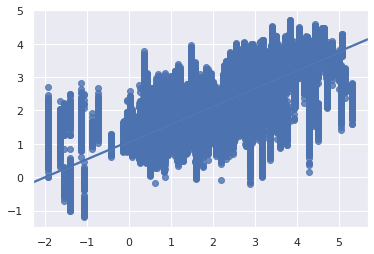

TEST HSP90
R2:   -0.9190970905667865
MAE:   0.9820450901658905
RMSE:   1.2093351262880687
Pearsons:   0.4994954934715945
Q2:   0.24728739894403973
ADJUSTED R2:   -0.9662880026299041


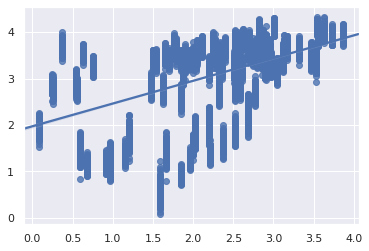

TEST HIV1
R2:   -1.7418866439382448
MAE:   1.8280804365304504
RMSE:   2.306810599844799
Pearsons:   0.08940888739297329
Q2:   -2.232237777415672
ADJUSTED R2:   -1.8093100860023004


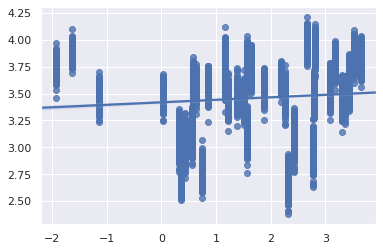

TEST HCA
R2:   -0.4138661833095563
MAE:   0.7406870352876038
RMSE:   0.8613072236397497
Pearsons:   0.051101102264535354
Q2:   0.5557177880989924
ADJUSTED R2:   -0.4486333845384798


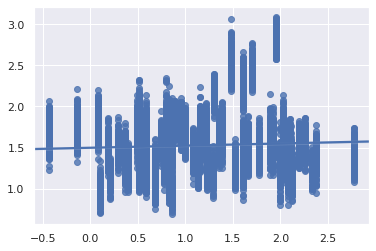

TEST LEAKY
R2:   0.5848266055432512
MAE:   0.5747636394526969
RMSE:   0.7715588620103375
Pearsons:   0.7769871947681269
Q2:   0.6644834549007721
ADJUSTED R2:   0.5746174237123475


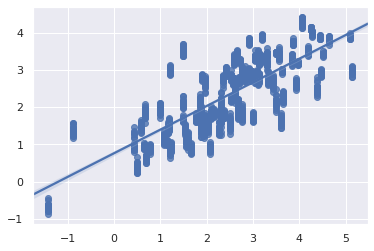


NEW BATCH

VALIDATION
R2:   0.5214419174901629
MAE:   0.6508269638807387
RMSE:   0.896495757039033
Pearsons:   0.7278141251628236
Q2:   0.5255175748266145
ADJUSTED R2:   0.4962546499896452


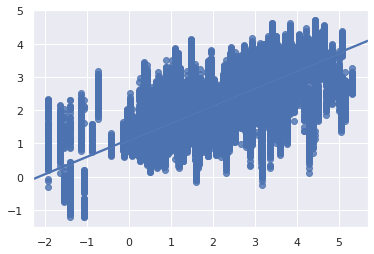

TEST HSP90
R2:   -1.1405310156789525
MAE:   1.0450817018072773
RMSE:   1.2774380776623853
Pearsons:   0.4683678947837309
Q2:   0.1604330590903694
ADJUSTED R2:   -1.25319054281995


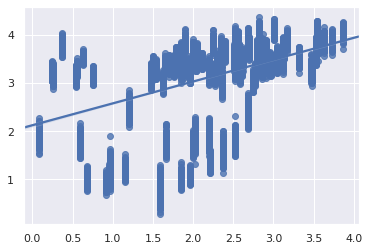

TEST HIV1
R2:   -1.33158134729272
MAE:   1.6766168833588853
RMSE:   2.1270967516113304
Pearsons:   -0.1116610317724414
Q2:   -1.7485693192925909
ADJUSTED R2:   -1.4542961550449682


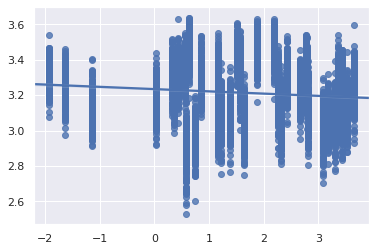

TEST HCA
R2:   -1.477464752943877
MAE:   0.9598936348706757
RMSE:   1.1385238356028504
Pearsons:   0.23964980772485603
Q2:   0.22151198417903722
ADJUSTED R2:   -1.6078576346777655


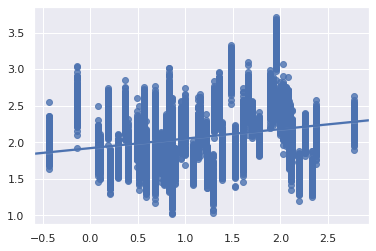

TEST LEAKY
R2:   0.5208650216155825
MAE:   0.5987670907404381
RMSE:   0.828863126623709
Pearsons:   0.7448618751809566
Q2:   0.612794252047797
ADJUSTED R2:   0.49564739117429735


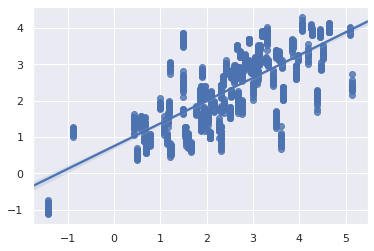


NEW BATCH

VALIDATION
R2:   0.5498162777455385
MAE:   0.636733516722229
RMSE:   0.8693745920192577
Pearsons:   0.7469894312296019
Q2:   0.5528789630857696
ADJUSTED R2:   0.5042029490589631


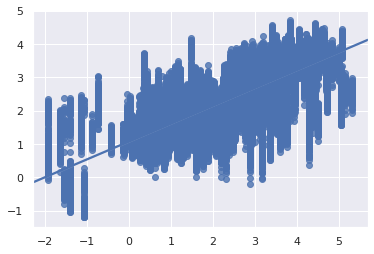

TEST HSP90
R2:   -1.0463228691334918
MAE:   1.0298197363638835
RMSE:   1.2488736187811023
Pearsons:   0.4991404096754809
Q2:   0.19739186847249257
ADJUSTED R2:   -1.2536595475038457


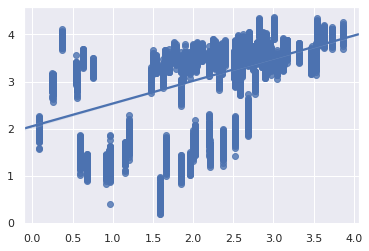

TEST HIV1
R2:   -1.7523909622644527
MAE:   1.8332589861425561
RMSE:   2.3111672557844223
Pearsons:   0.09421222173727958
Q2:   -2.2446093711564377
ADJUSTED R2:   -2.0312675795864017


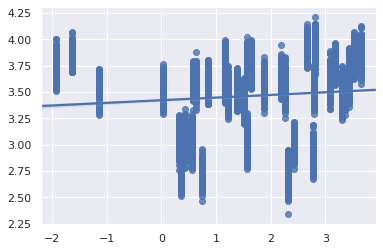

TEST HCA
R2:   -1.6825462097664576
MAE:   0.9851674642088843
RMSE:   1.1840799162949898
Pearsons:   -0.058135941801538846
Q2:   0.15706663002338017
ADJUSTED R2:   -1.9543460459983013


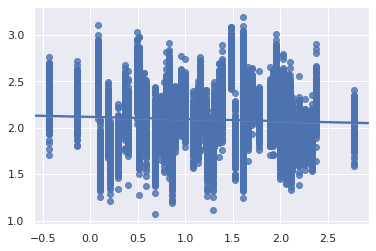

TEST LEAKY
R2:   0.5626496663959524
MAE:   0.5821588406972678
RMSE:   0.7918842151634353
Pearsons:   0.7661118782350129
Q2:   0.6465650736298003
ADJUSTED R2:   0.5183366369999476


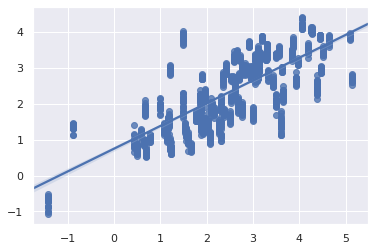


NEW BATCH

VALIDATION
R2:   0.548243700045689
MAE:   0.6378301581341749
RMSE:   0.8711885150781569
Pearsons:   0.746405551062717
Q2:   0.5511979191925492
ADJUSTED R2:   0.5371349385714027


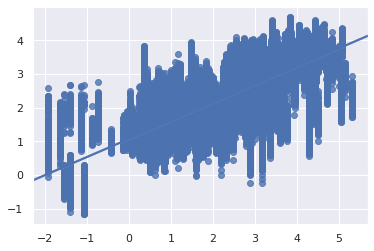

TEST HSP90
R2:   -0.9065275821718282
MAE:   0.9769084549642305
RMSE:   1.2054663063535074
Pearsons:   0.4992564485122179
Q2:   0.2522157856908581
ADJUSTED R2:   -0.9534094079629387


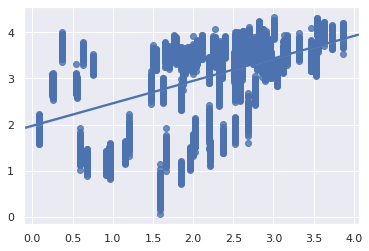

TEST HIV1
R2:   -1.7470148280788709
MAE:   1.8289670798959667
RMSE:   2.3089391442279954
Pearsons:   0.0842677088131709
Q2:   -2.238270314189347
ADJUSTED R2:   -1.8145643730316299


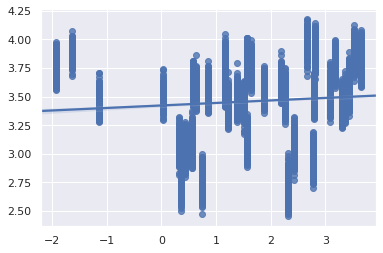

TEST HCA
R2:   -0.40388497578960303
MAE:   0.738126800967057
RMSE:   0.8583766863057488
Pearsons:   0.05027676610781283
Q2:   0.5588542362328883
ADJUSTED R2:   -0.43840673748934744


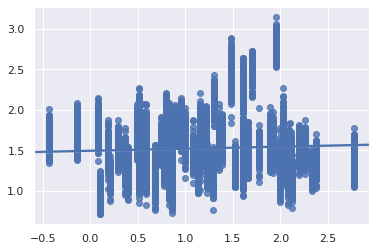

TEST LEAKY
R2:   0.5929480581730757
MAE:   0.5692923900844138
RMSE:   0.764012959703823
Pearsons:   0.7821510653893633
Q2:   0.6710523382779477
ADJUSTED R2:   0.5829385841937251


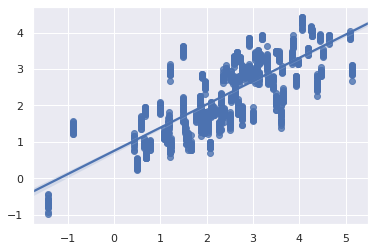


NEW BATCH

VALIDATION
R2:   0.5198363592108508
MAE:   0.6520683368212182
RMSE:   0.8978618441165674
Pearsons:   0.7268451684367845
Q2:   0.5230721551447709
ADJUSTED R2:   0.4945645886430008


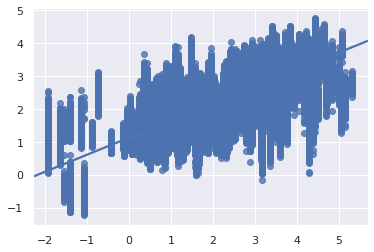

TEST HSP90
R2:   -1.1432147431023365
MAE:   1.0461428141415194
RMSE:   1.2782406568509932
Pearsons:   0.4683025142021519
Q2:   0.15937766764914854
ADJUSTED R2:   -1.256015519055091


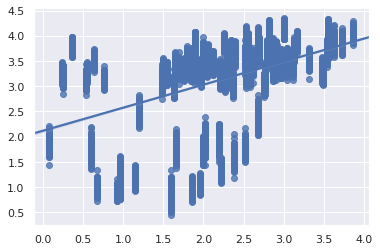

TEST HIV1
R2:   -1.3265514741343463
MAE:   1.6762342588275323
RMSE:   2.124881579568648
Pearsons:   -0.1320704028182356
Q2:   -1.7426410306172493
ADJUSTED R2:   -1.4490015517203645


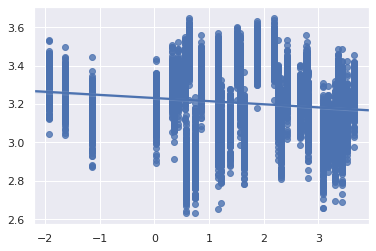

TEST HCA
R2:   -1.5431041102010161
MAE:   0.9722490472155897
RMSE:   1.153433069846827
Pearsons:   0.2170698278690862
Q2:   0.20088180674995315
ADJUSTED R2:   -1.6769516949484378


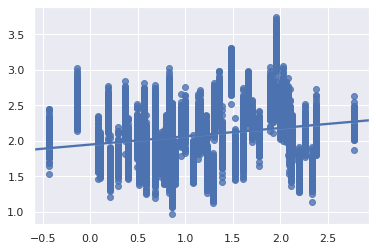

TEST LEAKY
R2:   0.5297858079567999
MAE:   0.5885587448346704
RMSE:   0.8211236806073575
Pearsons:   0.748370461611573
Q2:   0.6200065250343327
ADJUSTED R2:   0.5050376925861051


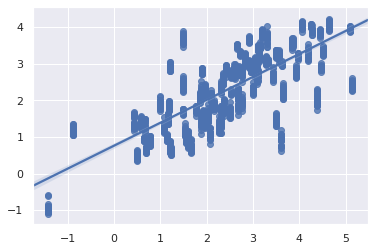


NEW BATCH

VALIDATION
R2:   0.5478431090896221
MAE:   0.6380718852171499
RMSE:   0.8712454196577863
Pearsons:   0.7463301165980121
Q2:   0.5514169714146939
ADJUSTED R2:   0.5020298558255749


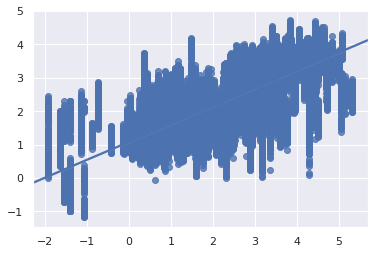

TEST HSP90
R2:   -1.0531357081961
MAE:   1.0326703545659373
RMSE:   1.2509605516442617
Pearsons:   0.5035480957564379
Q2:   0.19472679328026907
ADJUSTED R2:   -1.2611626742247797


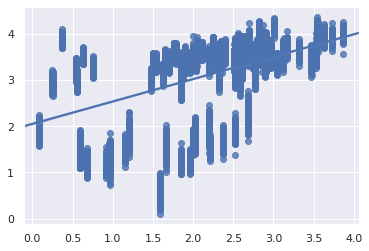

TEST HIV1
R2:   -1.7474612128377272
MAE:   1.8282004802015754
RMSE:   2.30909762699965
Pearsons:   0.08612877119246778
Q2:   -2.238746813051554
ADJUSTED R2:   -2.025838340129656


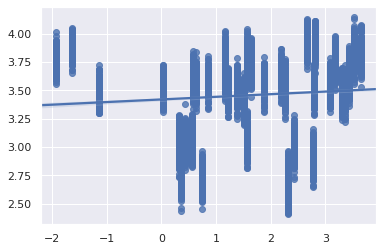

TEST HCA
R2:   -1.6206042343861942
MAE:   0.9742267101234623
RMSE:   1.1706621982608316
Pearsons:   -0.03771745755945466
Q2:   0.17654810620983688
ADJUSTED R2:   -1.8861280114385397


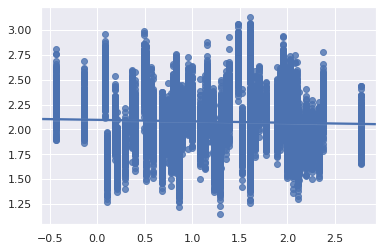

TEST LEAKY
R2:   0.5556285528286665
MAE:   0.5859545747557239
RMSE:   0.7982240649292529
Pearsons:   0.7629224475087911
Q2:   0.6408931545269437
ADJUSTED R2:   0.5106041330712185


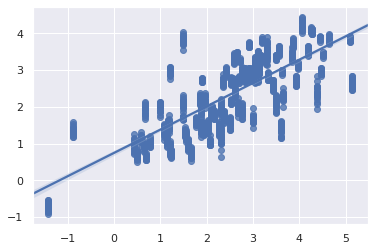


NEW BATCH

VALIDATION
R2:   0.5490639657325902
MAE:   0.63941514362828
RMSE:   0.8704105988223091
Pearsons:   0.7464960199481036
Q2:   0.5511935361103992
ADJUSTED R2:   0.5379753747260145


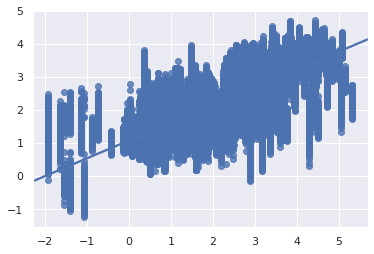

TEST HSP90
R2:   -0.9254060193945952
MAE:   0.9854678073892035
RMSE:   1.2113210308853624
Pearsons:   0.5028560037990579
Q2:   0.24481550303423866
ADJUSTED R2:   -0.9727520690518394


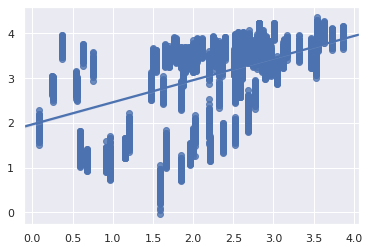

TEST HIV1
R2:   -1.7644476425292777
MAE:   1.836370027651396
RMSE:   2.3162553994980426
Pearsons:   0.0784786202371308
Q2:   -2.258826570642122
ADJUSTED R2:   -1.8324258632472104


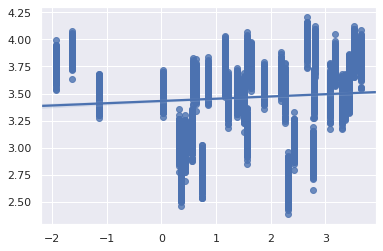

TEST HCA
R2:   -0.3848203912985093
MAE:   0.7361469928026966
RMSE:   0.8525289815582286
Pearsons:   0.059508650038454326
Q2:   0.5648478004786779
ADJUSTED R2:   -0.41887335174027585


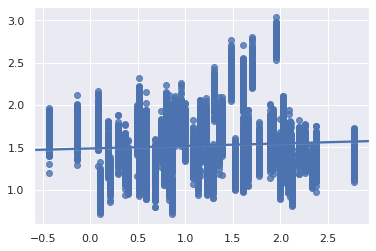

TEST LEAKY
R2:   0.5877895591458242
MAE:   0.5704330905762498
RMSE:   0.7687332728584438
Pearsons:   0.7789013771876669
Q2:   0.6668832042997109
ADJUSTED R2:   0.577653236829738


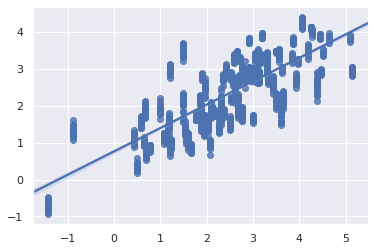


NEW BATCH

VALIDATION
R2:   0.5207126270656129
MAE:   0.6524013966010648
RMSE:   0.8973475898957897
Pearsons:   0.7265867011909051
Q2:   0.5239636124883754
ADJUSTED R2:   0.49548697585853996


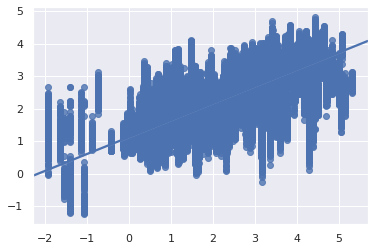

TEST HSP90
R2:   -1.1140434787768771
MAE:   1.0413197182374128
RMSE:   1.2694853762552987
Pearsons:   0.47640362186400564
Q2:   0.1708241518902062
ADJUSTED R2:   -1.2253089250282918


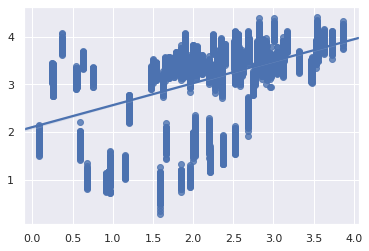

TEST HIV1
R2:   -1.3333704528128612
MAE:   1.6726800924896101
RMSE:   2.127782986974857
Pearsons:   -0.07873064451836907
Q2:   -1.7506689587848348
ADJUSTED R2:   -1.4561794240135382


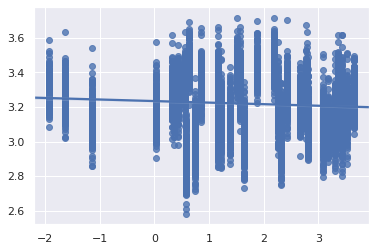

TEST HCA
R2:   -1.4748604044094598
MAE:   0.9613913854290718
RMSE:   1.1380243360401696
Pearsons:   0.23949193737560093
Q2:   0.22233417179377768
ADJUSTED R2:   -1.6051162151678522


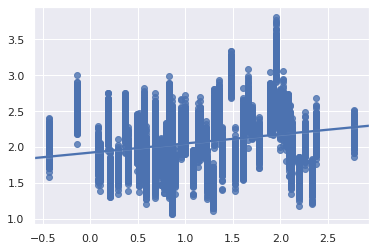

TEST LEAKY
R2:   0.5286224889642384
MAE:   0.5918141973184161
RMSE:   0.8220400712729816
Pearsons:   0.7485803473656357
Q2:   0.6190650932187731
ADJUSTED R2:   0.5038131462781457


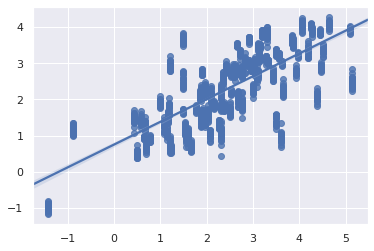


NEW BATCH

VALIDATION
R2:   0.5500364417083966
MAE:   0.6380324232953367
RMSE:   0.8695927929804235
Pearsons:   0.7471366181403767
Q2:   0.5524321105553367
ADJUSTED R2:   0.5044454203836967


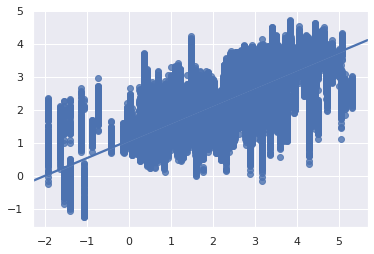

TEST HSP90
R2:   -1.058174326443374
MAE:   1.0344486896706755
RMSE:   1.252473214834535
Pearsons:   0.5016812346362051
Q2:   0.1927501028215791
ADJUSTED R2:   -1.266711813263628


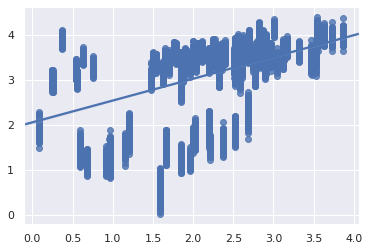

TEST HIV1
R2:   -1.7677390539547817
MAE:   1.8386111168551411
RMSE:   2.3176598408700473
Pearsons:   0.08313107526659175
Q2:   -2.262674744303525
ADJUSTED R2:   -2.0481707642673808


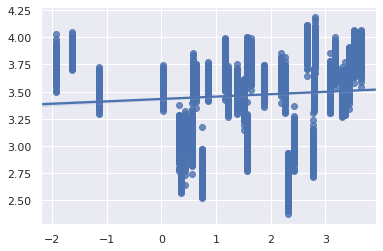

TEST HCA
R2:   -1.6157730380791508
MAE:   0.9740199847082245
RMSE:   1.1697776929954415
Pearsons:   -0.03863533852774162
Q2:   0.17805515826897284
ADJUSTED R2:   -1.8808073106598577


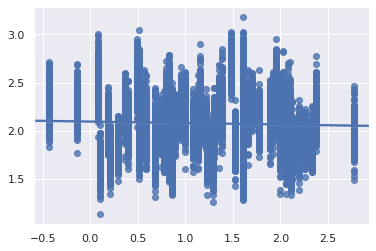

TEST LEAKY
R2:   0.5517049057481431
MAE:   0.5874313900335764
RMSE:   0.8017303531578452
Pearsons:   0.7612284505459039
Q2:   0.6377258364950021
ADJUSTED R2:   0.5062829358459726


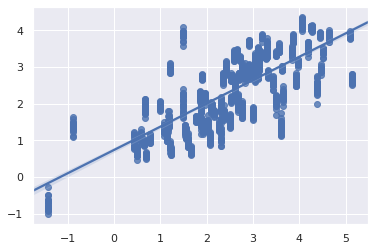


NEW BATCH

VALIDATION
R2:   0.5490833904158968
MAE:   0.6396885860224357
RMSE:   0.8700661716230482
Pearsons:   0.7464981319521155
Q2:   0.5526473617502761
ADJUSTED R2:   0.5379952770654681


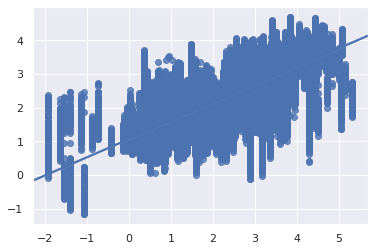

TEST HSP90
R2:   -0.9194416764798643
MAE:   0.9836609464941297
RMSE:   1.2094425139903555
Pearsons:   0.5018621633708016
Q2:   0.2471553405801106
ADJUSTED R2:   -0.966641061967074


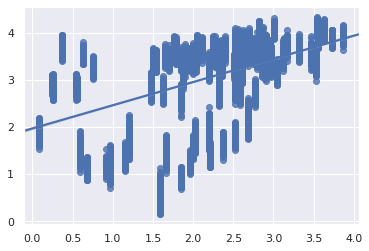

TEST HIV1
R2:   -1.765479412147621
MAE:   1.8373962500229917
RMSE:   2.3166528146773935
Pearsons:   0.07922438735234243
Q2:   -2.260050833619472
ADJUSTED R2:   -1.833483004249612


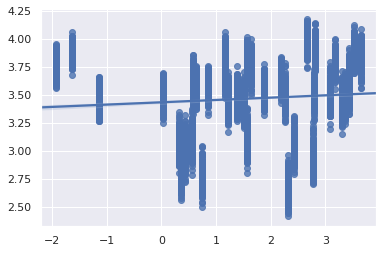

TEST HCA
R2:   -0.3884589418229357
MAE:   0.7350866258008456
RMSE:   0.8535672431042823
Pearsons:   0.05682294848662393
Q2:   0.5637033295071823
ADJUSTED R2:   -0.42260137481858173


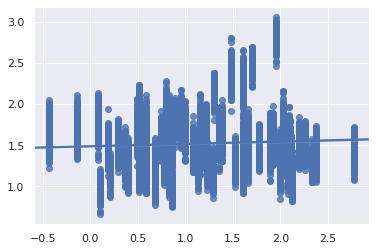

TEST LEAKY
R2:   0.5853057235686775
MAE:   0.5746650347637355
RMSE:   0.771116169713046
Pearsons:   0.7775815832618672
Q2:   0.6648762770662648
ADJUSTED R2:   0.575108323328563


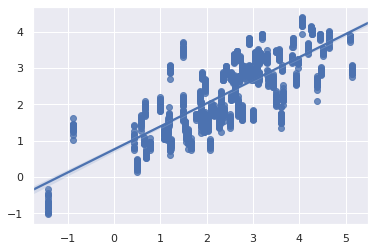


NEW BATCH

VALIDATION
R2:   0.5241651654984261
MAE:   0.6491912597655226
RMSE:   0.8939635689899785
Pearsons:   0.7297258320863486
Q2:   0.5268444310844705
ADJUSTED R2:   0.49912122684044846


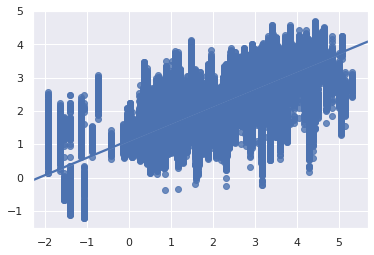

TEST HSP90
R2:   -1.1361624178330092
MAE:   1.042891384858464
RMSE:   1.2761258799767237
Pearsons:   0.46578761453154627
Q2:   0.16214377431269028
ADJUSTED R2:   -1.2485920187715887


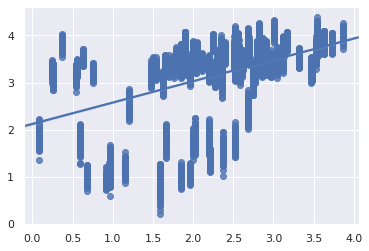

TEST HIV1
R2:   -1.340259383308161
MAE:   1.6742078058143548
RMSE:   2.131083954168519
Pearsons:   -0.08097775854399139
Q2:   -1.7587900906147047
ADJUSTED R2:   -1.463430929798064


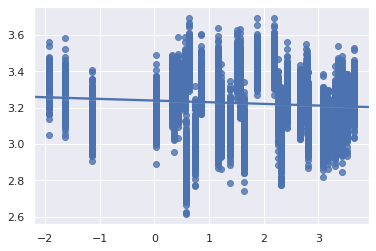

TEST HCA
R2:   -1.4885088012931902
MAE:   0.9628139099543922
RMSE:   1.1408474784098035
Pearsons:   0.2334564213427963
Q2:   0.21804581865507744
ADJUSTED R2:   -1.6194829487296745


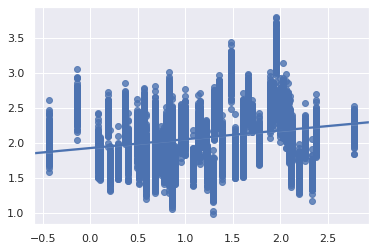

TEST LEAKY
R2:   0.5258264043288581
MAE:   0.5945722329134944
RMSE:   0.8245372367816236
Pearsons:   0.7467764581790781
Q2:   0.616806147534023
ADJUSTED R2:   0.5008698992935348


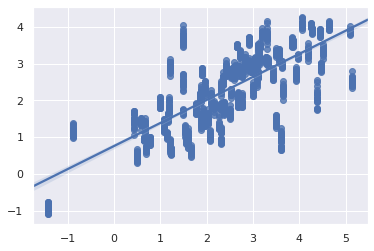

In [34]:
#CHOOSE THE BEST PREPROCESSING METHOD BY ADJUSTED R^2
#DELETE ZERO COLUMNS IN VECTORS 


from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from scipy.stats import pearsonr
def q2(exp_test,comp_test,exp_train,comp_train):
        """
        Q^2_F13 score as defined in Ref. Todeschini et all 2016 JCIM, 56(10), pp.1905-1913.

        ----- Parameters
        exp_test - array of exp. test data
        comp_test  - array of computed test data
        exp_train - array of exp. train data
        comp_train  - array of computed train data
        ----- Returns
        Q^2_F13 score
        """
        q2 = 1-mse(exp_test,comp_test)/np.sum(((exp_train-np.mean(comp_train))**2)/len(exp_train))
        return(q2)



r2_scores_prep_val=[]
adj_r2_scores_prep_val=[]
rmse_scores_prep_val=[]

r2_scores_prep_test=[]
adj_r2_scores_prep_test=[]
rmse_scores_prep_test=[]

rounds = 200

for feats in [df, df_dropped, df_uncor, 
              np.log(df.replace(0, 0.1)), np.log(df_dropped.replace(0, 0.1)), np.log(df_uncor.replace(0, 0.1)), 
              boxcox.fit_transform(df), boxcox.fit_transform(df_dropped), boxcox.fit_transform(df_uncor), 
              maxabs.fit_transform(np.array(df)), maxabs.fit_transform(np.array(df_dropped)), maxabs.fit_transform(np.array(df_uncor)),
              scale.fit_transform(df), scale.fit_transform(df_dropped), scale.fit_transform(df_uncor)]:

    X = np.array(feats)

    print('\nNEW BATCH\n')

    model = RandomForestRegressor(n_estimators=100, n_jobs=-1)


    #VALIDATION MODEL 5FOLD CV

    r2_total_all = []
    rmse_total_all = []
    mae_total_all = []
    corr_total_all = []
    q2_total_all = []

    y_test_all = []
    y_pred_all =[]
        
    for round in range(rounds):
        r2_total = []
        rmse_total = []
        mae_total = []
        corr_total = []
        q2_total = []

        from sklearn.model_selection import KFold
        kf = KFold(n_splits=5, shuffle=True)

        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]


            new_gs1 = model

            new_gs1.fit(X_train, y_train)
            y_pred = new_gs1.predict(X_test)
            X_pred = new_gs1.predict(X_train)
            
            
            r2_total.append(r2(y_test, y_pred))
            rmse_total.append((mse(y_test, y_pred))**0.5)
            mae_total.append(mae(y_test, y_pred))
            corr, _ = pearsonr(y_test, y_pred)
            corr_total.append(corr)
            q2_total.append(q2(y_test, y_pred, y_train, X_pred))
            
            y_test_all.append(y_test)
            y_pred_all.append(y_pred)
        
        r2_total_all.append(np.mean(r2_total))
        rmse_total_all.append(np.mean(rmse_total))
        mae_total_all.append(np.mean(mae_total))
        corr_total_all.append(np.mean(corr_total))
        q2_total_all.append(np.mean(q2_total))
       
        
    print("VALIDATION")
    r_2 = np.mean(r2_total_all)
    print ( "R2:  ", r_2)
    r2_scores_prep_val.append(r_2)
    print ( "MAE:  ", np.mean(mae_total_all))
    rmse = np.mean(rmse_total_all)
    print ( "RMSE:  ", rmse)
    rmse_scores_prep_val.append(rmse)
    print ('Pearsons:  ', np.mean(corr_total_all))
    print ('Q2:  ', np.mean(q2_total_all))
    adj_r2 = 1 - (((1-r_2)*(X.shape[0] - 1)) / (X.shape[0] - X.shape[1] - 1))
    print ( "ADJUSTED R2:  ", adj_r2)
    adj_r2_scores_prep_val.append(adj_r2)


    ax = sns.regplot(np.concatenate(y_test_all).flatten(), np.concatenate(y_pred_all).flatten())
    plt.show()






    #TEST HSP90

    r2_total_all = []
    rmse_total_all = []
    mae_total_all = []
    corr_total_all = []
    q2_total_all = []

    y_test_all = []
    y_pred_all = []

    for round in range(rounds):

        new_gs2 = model

        X_train = np.concatenate((X[:268], X[368:]))
        y_train = np.concatenate((y[:268], y[368:]))


        from sklearn.utils import shuffle
        X_train, y_train = shuffle(X_train, y_train)


        X_test = X[268:368]
        y_test = y[268:368]


        new_gs2.fit(X_train, y_train)
        y_pred = new_gs2.predict(X_test)
        X_pred = new_gs2.predict(X_train)


        y_test_all.append(y_test)
        y_pred_all.append(y_pred)


        r2_total_all.append(r2(y_test, y_pred))
        rmse_total_all.append((mse(y_test, y_pred))**0.5)
        mae_total_all.append(mae(y_test, y_pred))
        corr, _ = pearsonr(y_test, y_pred)
        corr_total_all.append(corr)
        q2_total_all.append(q2(y_test, y_pred, y_train, X_pred))

        

    print("TEST HSP90")    

    r_2 = np.mean(r2_total_all)
    print ( "R2:  ", r_2)
    #r2_scores_prep_val.append(r_2)
    print ( "MAE:  ", np.mean(mae_total_all))
    rmse = np.mean(rmse_total_all)
    print ( "RMSE:  ", rmse)
    #rmse_scores_prep_val.append(rmse)
    print ('Pearsons:  ', np.mean(corr_total_all))
    print ('Q2:  ', np.mean(q2_total_all))
    adj_r2 = 1 - (((1-r_2)*(X.shape[0] - 1)) / (X.shape[0] - X.shape[1] - 1))
    print ( "ADJUSTED R2:  ", adj_r2)
    #adj_r2_scores_prep_val.append(adj_r2)


    ax = sns.regplot(np.concatenate(y_test_all).flatten(), np.concatenate(y_pred_all).flatten())
    plt.show()




   
    #TEST HIV1

    r2_total_all = []
    rmse_total_all = []
    mae_total_all = []
    corr_total_all = []
    q2_total_all = []

    y_test_all = []
    y_pred_all = []

    for round in range(rounds):

        new_gs3 = model

        X_train = np.concatenate((X[:228], X[267:])) 
        y_train = np.concatenate((y[:228], y[267:]))

        from sklearn.utils import shuffle
        X_train, y_train = shuffle(X_train, y_train)



        X_test = X[228:267]
        y_test = y[228:267]



        new_gs3.fit(X_train, y_train)
        y_pred = new_gs3.predict(X_test)
        X_pred = new_gs3.predict(X_train)


        y_test_all.append(y_test)
        y_pred_all.append(y_pred)


        r2_total_all.append(r2(y_test, y_pred))
        rmse_total_all.append((mse(y_test, y_pred))**0.5)
        mae_total_all.append(mae(y_test, y_pred))
        corr, _ = pearsonr(y_test, y_pred)
        corr_total_all.append(corr)
        q2_total_all.append(q2(y_test, y_pred, y_train, X_pred))

    print("TEST HIV1")    

    r_2 = np.mean(r2_total_all)
    print ( "R2:  ", r_2)
    #r2_scores_prep_val.append(r_2)
    print ( "MAE:  ", np.mean(mae_total_all))
    rmse = np.mean(rmse_total_all)
    print ( "RMSE:  ", rmse)
    #rmse_scores_prep_val.append(rmse)
    print ('Pearsons:  ', np.mean(corr_total_all))
    print ('Q2:  ', np.mean(q2_total_all))
    adj_r2 = 1 - (((1-r_2)*(X.shape[0] - 1)) / (X.shape[0] - X.shape[1] - 1))
    print ( "ADJUSTED R2:  ", adj_r2)
    #adj_r2_scores_prep_val.append(adj_r2)


    ax = sns.regplot(np.concatenate(y_test_all).flatten(), np.concatenate(y_pred_all).flatten())
    plt.show()




    #TEST HCA


    r2_total_all = []
    rmse_total_all = []
    mae_total_all = []
    corr_total_all = []
    q2_total_all = []

    y_test_all = []
    y_pred_all = []

    for round in range(rounds):

        new_gs4 = model

        X_train = np.concatenate((X[:154], X[217:])) 
        y_train = np.concatenate((y[:154], y[217:]))



        from sklearn.utils import shuffle
        X_train, y_train = shuffle(X_train, y_train)


        X_test = X[154:217]
        y_test = y[154:217]


        new_gs4.fit(X_train, y_train)
        y_pred = new_gs4.predict(X_test)
        X_pred = new_gs4.predict(X_train)


        y_test_all.append(y_test)
        y_pred_all.append(y_pred)


        r2_total_all.append(r2(y_test, y_pred))
        rmse_total_all.append((mse(y_test, y_pred))**0.5)
        mae_total_all.append(mae(y_test, y_pred))
        corr, _ = pearsonr(y_test, y_pred)
        corr_total_all.append(corr)
        q2_total_all.append(q2(y_test, y_pred, y_train, X_pred))

    print("TEST HCA")    

    r_2 = np.mean(r2_total_all)
    print ( "R2:  ", r_2)
    #r2_scores_prep_val.append(r_2)
    print ( "MAE:  ", np.mean(mae_total_all))
    rmse = np.mean(rmse_total_all)
    print ( "RMSE:  ", rmse)
    #rmse_scores_prep_val.append(rmse)
    print ('Pearsons:  ', np.mean(corr_total_all))
    print ('Q2:  ', np.mean(q2_total_all))
    adj_r2 = 1 - (((1-r_2)*(X.shape[0] - 1)) / (X.shape[0] - X.shape[1] - 1))
    print ( "ADJUSTED R2:  ", adj_r2)
    #adj_r2_scores_prep_val.append(adj_r2)


    ax = sns.regplot(np.concatenate(y_test_all).flatten(), np.concatenate(y_pred_all).flatten())
    plt.show()



    
    #TEST LEAKY

    r2_total_all = []
    rmse_total_all = []
    mae_total_all = []
    corr_total_all = []
    q2_total_all = []

    y_test_all = []
    y_pred_all = []

    for round in range(20):

        new_gs5 = model

        leaky_sorted = (pd.DataFrame(sorted(y)))
        fifth_leaky = list(leaky_sorted.iloc[: :5, :].index)

        #leakytest_indices = [0, 10, 11, 13, 27, 37, 38, 45, 46, 50, 60, 68, 72, 79, 85, 89, 90, 92, 104, 107, 112, 116, 126, 131, 137, 141, 
        #                     145, 146, 157, 158, 169, 172, 179, 184, 186, 194, 196, 202,  207,  213,  216,  221,  224,  230, 232, 235, 240, 
        #                     242, 247, 249, 252,  268, 269, 280, 288, 289, 291, 293, 299, 300, 309, 318, 319, 320, 321,  336, 342, 349, 360, 
        #                     363, 367,  375,  378,  383,  384, 388,  397, 403, 406, 411, 416, 418,  422,  425,  427,  432, 433,  438, 442, 
        #                     448, 452, 453, 460, 461,  474, 478, 486, 490,  492,  495]

        leakytest_indices = fifth_leaky

        X_train = []
        y_train = []
        for i in range(len(X)):
            if i not in leakytest_indices:
                X_train.append(X[i])
        X_train = np.array(X_train)
        for i in range(len(y)):
            if i not in leakytest_indices:
                y_train.append(y[i])
        y_train = np.array(y_train)



        from sklearn.utils import shuffle
        X_train, y_train = shuffle(X_train, y_train)

        X_test = []
        y_test = []
        for i in leakytest_indices:
            X_test.append(X[i])
        X_test = np.array(X_test)
        for i in leakytest_indices:
            y_test.append(y[i])
        y_test = np.array(y_test)


        new_gs5.fit(X_train, y_train)
        y_pred = new_gs5.predict(X_test)
        X_pred = new_gs5.predict(X_train)

        y_test_all.append(y_test)
        y_pred_all.append(y_pred)


        r2_total_all.append(r2(y_test, y_pred))
        rmse_total_all.append((mse(y_test, y_pred))**0.5)
        mae_total_all.append(mae(y_test, y_pred))
        corr, _ = pearsonr(y_test, y_pred)
        corr_total_all.append(corr)
        q2_total_all.append(q2(y_test, y_pred, y_train, X_pred))

    print("TEST LEAKY")    

    r_2 = np.mean(r2_total_all)
    print ( "R2:  ", r_2)
    r2_scores_prep_test.append(r_2)
    print ( "MAE:  ", np.mean(mae_total_all))
    rmse = np.mean(rmse_total_all)
    print ( "RMSE:  ", rmse)
    rmse_scores_prep_test.append(rmse)
    print ('Pearsons:  ', np.mean(corr_total_all))
    print ('Q2:  ', np.mean(q2_total_all))
    adj_r2 = 1 - (((1-r_2)*(X.shape[0] - 1)) / (X.shape[0] - X.shape[1] - 1))
    print ( "ADJUSTED R2:  ", adj_r2)
    adj_r2_scores_prep_test.append(adj_r2)


    ax = sns.regplot(np.concatenate(y_test_all).flatten(), np.concatenate(y_pred_all).flatten())
    plt.show()




    import os
    os.system('spd-say "your RF-SCORE calculations are finished"')


In [9]:
#WRITE RESULTS TO A FILE



np.save('./prep_search/rf_r2_scores_prep_val.npy', r2_scores_prep_val)
np.save('./prep_search/rf_adj_r2_scores_prep_val.npy', adj_r2_scores_prep_val)
np.save('./prep_search/rf_rmse_scores_prep_val.npy', rmse_scores_prep_val)

np.save('./prep_search/rf_r2_scores_prep_test.npy', r2_scores_prep_test)
np.save('./prep_search/rf_adj_r2_scores_prep_test.npy', adj_r2_scores_prep_test)
np.save('./prep_search/rf_rmse_scores_prep_test.npy', rmse_scores_prep_test)

In [2]:
#READ THE RESULTS AGAIN FROM A FILE



r2_scores_prep_val = np.load('./prep_search/rf_r2_scores_prep_val.npy')
adj_r2_scores_prep_val = np.load('./prep_search/rf_adj_r2_scores_prep_val.npy')
rmse_scores_prep_val = np.load('./prep_search/rf_rmse_scores_prep_val.npy')

r2_scores_prep_test = np.load('./prep_search/rf_r2_scores_prep_test.npy')
adj_r2_scores_prep_test = np.load('./prep_search/rf_adj_r2_scores_prep_test.npy')
rmse_scores_prep_test = np.load('./prep_search/rf_rmse_scores_prep_test.npy')

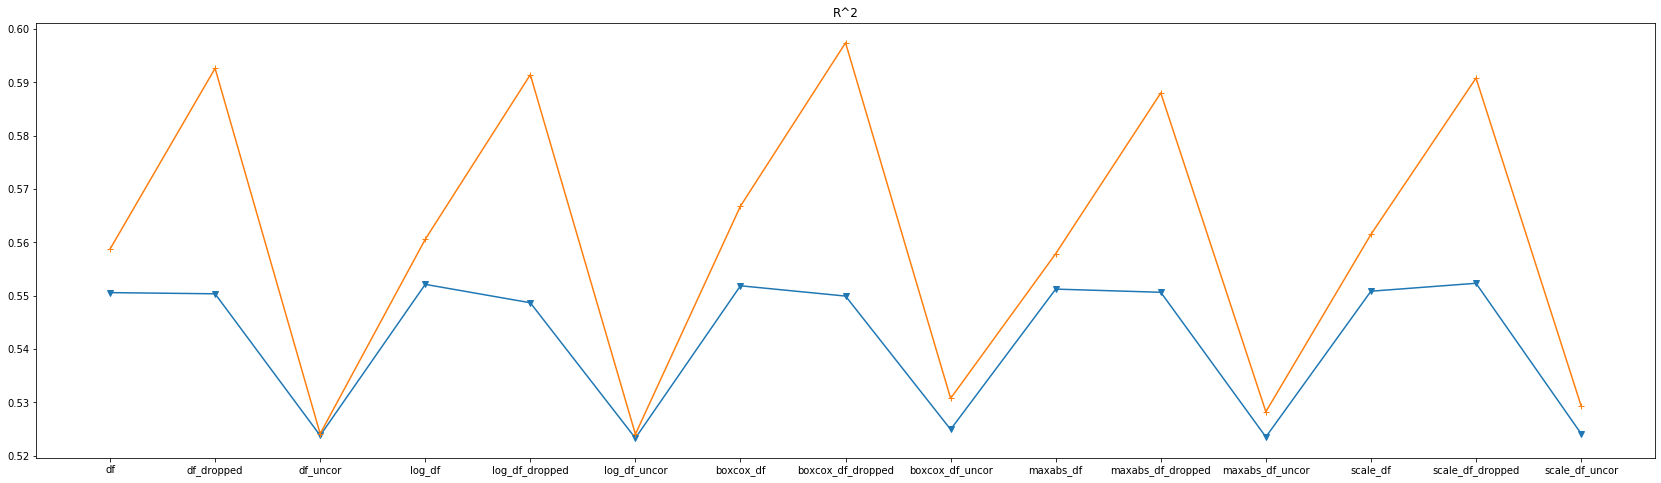

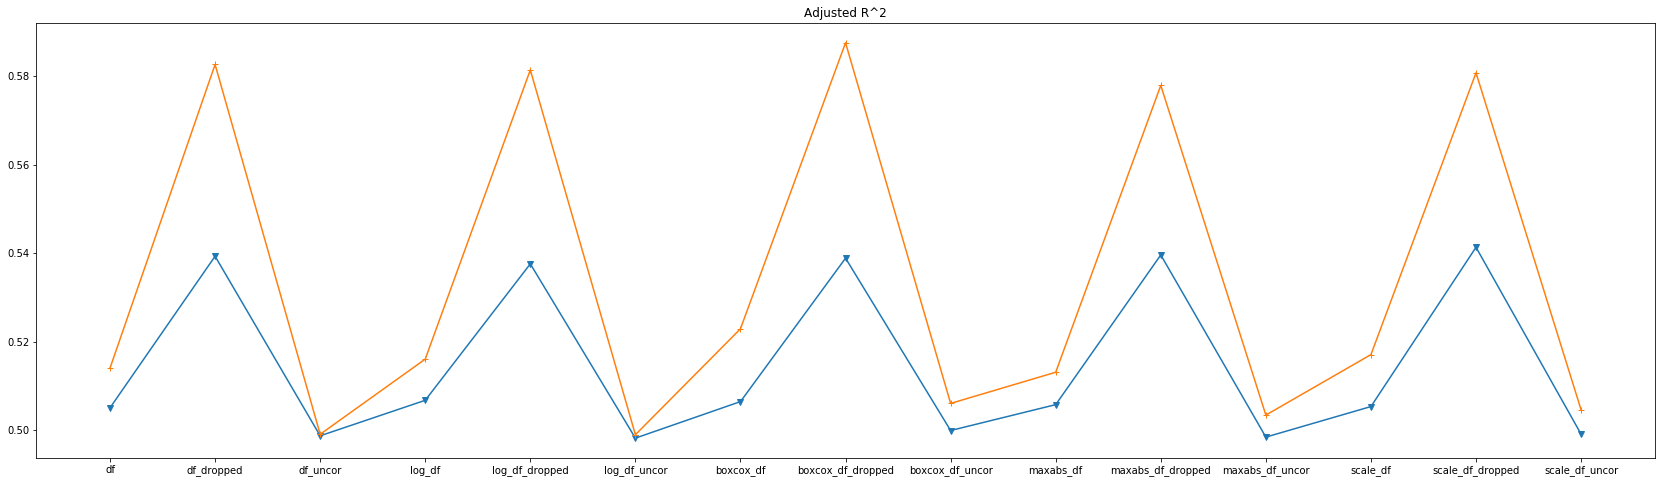

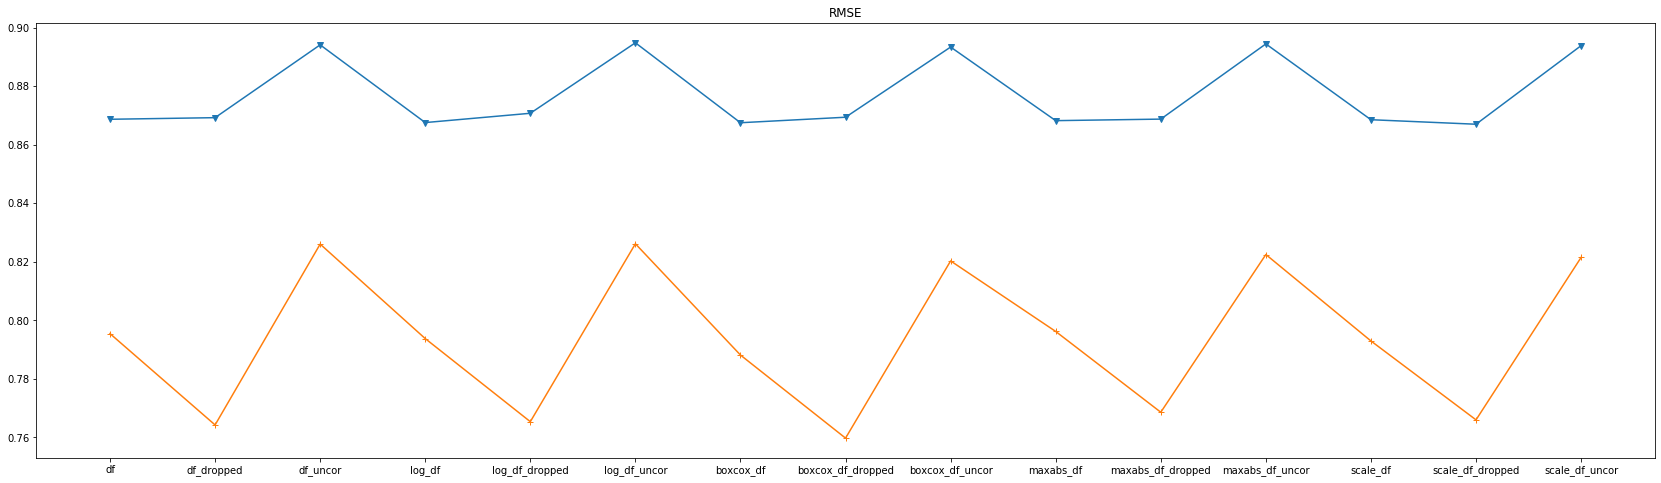

In [3]:
#BY R^2

plt.figure(figsize=(29, 8))
plt.xticks(range(18), ['df', 'df_dropped', 'df_uncor', 
              'log_df', 'log_df_dropped', 'log_df_uncor', 
              'boxcox_df', 'boxcox_df_dropped', 'boxcox_df_uncor', 
              'maxabs_df', 'maxabs_df_dropped', 'maxabs_df_uncor',
              'scale_df', 'scale_df_dropped', 'scale_df_uncor',
              'scale_df_float', 'scale_df_dropped_float', 'scale_df_uncor_float'])
plt.title('R^2')
plt.plot(r2_scores_prep_val, marker='v')
plt.plot(r2_scores_prep_test, marker='+')
plt.show()
plt.figure(figsize=(29, 8))
plt.xticks(range(18), ['df', 'df_dropped', 'df_uncor', 
              'log_df', 'log_df_dropped', 'log_df_uncor', 
              'boxcox_df', 'boxcox_df_dropped', 'boxcox_df_uncor', 
              'maxabs_df', 'maxabs_df_dropped', 'maxabs_df_uncor',
              'scale_df', 'scale_df_dropped', 'scale_df_uncor',
              'scale_df_float', 'scale_df_dropped_float', 'scale_df_uncor_float'])
plt.title('Adjusted R^2')
plt.plot(adj_r2_scores_prep_val, marker='v')
plt.plot(adj_r2_scores_prep_test, marker='+')
plt.show()


#BY RMSE

plt.figure(figsize=(29, 8))
plt.xticks(range(18), ['df', 'df_dropped', 'df_uncor', 
              'log_df', 'log_df_dropped', 'log_df_uncor', 
              'boxcox_df', 'boxcox_df_dropped', 'boxcox_df_uncor', 
              'maxabs_df', 'maxabs_df_dropped', 'maxabs_df_uncor',
              'scale_df', 'scale_df_dropped', 'scale_df_uncor',
              'scale_df_float', 'scale_df_dropped_float', 'scale_df_uncor_float'])
plt.plot(rmse_scores_prep_val, marker='v')
#plt.show()
#plt.figure(figsize=(25, 8))
plt.plot(rmse_scores_prep_test, marker='+')
plt.title('RMSE')
plt.show()

VALIDATION
R2:   0.5276933812271877
MAE:   0.6447738542531203
RMSE:   0.8925556246758376
Pearsons:   0.7329381893958156
Q2:   0.5216055465271694
ADJUSTED R2:   0.47983852558060314


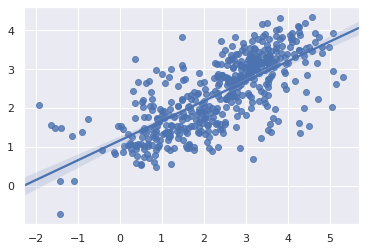

TEST HSP90
R2:   -1.2517678421203944
MAE:   1.0986447671856079
RMSE:   1.3104740575794016
Pearsons:   0.4992277428049683
Q2:   0.11681073942820663
ADJUSTED R2:   -1.4799205309695975


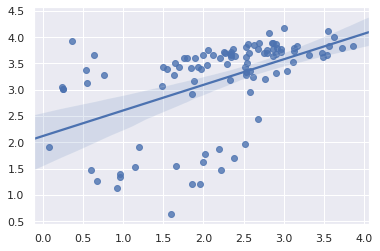

TEST HIV1
R2:   -1.7696824229260408
MAE:   1.8422456544844046
RMSE:   2.318917892307274
Pearsons:   0.07029409916674574
Q2:   -2.2650340033042364
ADJUSTED R2:   -2.0503110384648027


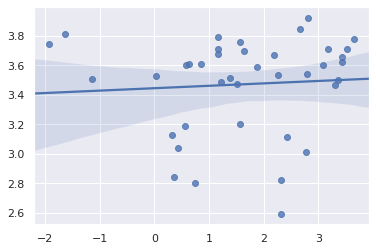

TEST HCA
R2:   -1.5988209968078144
MAE:   0.9689417863882386
RMSE:   1.168559778146707
Pearsons:   -0.03296930976632985
Q2:   0.18337460987740284
ADJUSTED R2:   -1.862137661682615


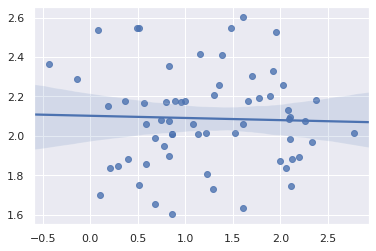

TEST LEAKY
R2:   0.5581453960961216
MAE:   0.5828148122351203
RMSE:   0.7959892077429891
Pearsons:   0.7646895159500549
Q2:   0.6429255252235743
ADJUSTED R2:   0.5133759868900016


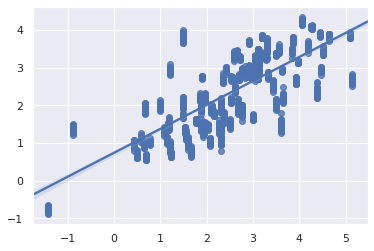

32512

In [6]:
#CHECK-FIT THE BEST PREPROCESSING OPTION

#CHOOSE THE BEST PREPROCESSING METHOD BY ADJUSTED R^2 AND RMSE
#DELETE ZERO COLUMNS IN VECTORS 


X = np.array(df)



from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from scipy.stats import pearsonr
def q2(exp_test,comp_test,exp_train,comp_train):
        """
        Q^2_F13 score as defined in Ref. Todeschini et all 2016 JCIM, 56(10), pp.1905-1913.

        ----- Parameters
        exp_test - array of exp. test data
        comp_test  - array of computed test data
        exp_train - array of exp. train data
        comp_train  - array of computed train data
        ----- Returns
        Q^2_F13 score
        """
        q2 = 1-mse(exp_test,comp_test)/np.sum(((exp_train-np.mean(comp_train))**2)/len(exp_train))
        return(q2)



r2_scores_prep_val=[]
adj_r2_scores_prep_val=[]
rmse_scores_prep_val=[]

r2_scores_prep_test=[]
adj_r2_scores_prep_test=[]
rmse_scores_prep_test=[]

rounds = 1


#print('\nNEW BATCH\n')

model = RandomForestRegressor(n_estimators=200, n_jobs=-1)


#VALIDATION MODEL 5FOLD CV

r2_total_all = []
rmse_total_all = []
mae_total_all = []
corr_total_all = []
q2_total_all = []

y_test_all = []
y_pred_all =[]

for round in range(rounds):
    r2_total = []
    rmse_total = []
    mae_total = []
    corr_total = []
    q2_total = []

    from sklearn.model_selection import KFold
    kf = KFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


        new_gs1 = model

        new_gs1.fit(X_train, y_train)
        y_pred = new_gs1.predict(X_test)
        X_pred = new_gs1.predict(X_train)


        r2_total.append(r2(y_test, y_pred))
        rmse_total.append((mse(y_test, y_pred))**0.5)
        mae_total.append(mae(y_test, y_pred))
        corr, _ = pearsonr(y_test, y_pred)
        corr_total.append(corr)
        q2_total.append(q2(y_test, y_pred, y_train, X_pred))

        y_test_all.append(y_test)
        y_pred_all.append(y_pred)

    r2_total_all.append(np.mean(r2_total))
    rmse_total_all.append(np.mean(rmse_total))
    mae_total_all.append(np.mean(mae_total))
    corr_total_all.append(np.mean(corr_total))
    q2_total_all.append(np.mean(q2_total))


print("VALIDATION")
r_2 = np.mean(r2_total_all)
print ( "R2:  ", r_2)
r2_scores_prep_val.append(r_2)
print ( "MAE:  ", np.mean(mae_total_all))
rmse = np.mean(rmse_total_all)
print ( "RMSE:  ", rmse)
rmse_scores_prep_val.append(rmse)
print ('Pearsons:  ', np.mean(corr_total_all))
print ('Q2:  ', np.mean(q2_total_all))
adj_r2 = 1 - (((1-r_2)*(X.shape[0] - 1)) / (X.shape[0] - X.shape[1] - 1))
print ( "ADJUSTED R2:  ", adj_r2)
adj_r2_scores_prep_val.append(adj_r2)


ax = sns.regplot(np.concatenate(y_test_all).flatten(), np.concatenate(y_pred_all).flatten())
plt.show()






#TEST HSP90

r2_total_all = []
rmse_total_all = []
mae_total_all = []
corr_total_all = []
q2_total_all = []

y_test_all = []
y_pred_all = []

for round in range(rounds):

    new_gs2 = model

    X_train = np.concatenate((X[:268], X[368:]))
    y_train = np.concatenate((y[:268], y[368:]))


    from sklearn.utils import shuffle
    X_train, y_train = shuffle(X_train, y_train)


    X_test = X[268:368]
    y_test = y[268:368]


    new_gs2.fit(X_train, y_train)
    y_pred = new_gs2.predict(X_test)
    X_pred = new_gs2.predict(X_train)


    y_test_all.append(y_test)
    y_pred_all.append(y_pred)


    r2_total_all.append(r2(y_test, y_pred))
    rmse_total_all.append((mse(y_test, y_pred))**0.5)
    mae_total_all.append(mae(y_test, y_pred))
    corr, _ = pearsonr(y_test, y_pred)
    corr_total_all.append(corr)
    q2_total_all.append(q2(y_test, y_pred, y_train, X_pred))



print("TEST HSP90")    

r_2 = np.mean(r2_total_all)
print ( "R2:  ", r_2)
#r2_scores_prep_val.append(r_2)
print ( "MAE:  ", np.mean(mae_total_all))
rmse = np.mean(rmse_total_all)
print ( "RMSE:  ", rmse)
#rmse_scores_prep_val.append(rmse)
print ('Pearsons:  ', np.mean(corr_total_all))
print ('Q2:  ', np.mean(q2_total_all))
adj_r2 = 1 - (((1-r_2)*(X.shape[0] - 1)) / (X.shape[0] - X.shape[1] - 1))
print ( "ADJUSTED R2:  ", adj_r2)
#adj_r2_scores_prep_val.append(adj_r2)


ax = sns.regplot(np.concatenate(y_test_all).flatten(), np.concatenate(y_pred_all).flatten())
plt.show()





#TEST HIV1

r2_total_all = []
rmse_total_all = []
mae_total_all = []
corr_total_all = []
q2_total_all = []

y_test_all = []
y_pred_all = []

for round in range(rounds):

    new_gs3 = model

    X_train = np.concatenate((X[:228], X[267:])) 
    y_train = np.concatenate((y[:228], y[267:]))

    from sklearn.utils import shuffle
    X_train, y_train = shuffle(X_train, y_train)



    X_test = X[228:267]
    y_test = y[228:267]



    new_gs3.fit(X_train, y_train)
    y_pred = new_gs3.predict(X_test)
    X_pred = new_gs3.predict(X_train)


    y_test_all.append(y_test)
    y_pred_all.append(y_pred)


    r2_total_all.append(r2(y_test, y_pred))
    rmse_total_all.append((mse(y_test, y_pred))**0.5)
    mae_total_all.append(mae(y_test, y_pred))
    corr, _ = pearsonr(y_test, y_pred)
    corr_total_all.append(corr)
    q2_total_all.append(q2(y_test, y_pred, y_train, X_pred))

print("TEST HIV1")    

r_2 = np.mean(r2_total_all)
print ( "R2:  ", r_2)
#r2_scores_prep_val.append(r_2)
print ( "MAE:  ", np.mean(mae_total_all))
rmse = np.mean(rmse_total_all)
print ( "RMSE:  ", rmse)
#rmse_scores_prep_val.append(rmse)
print ('Pearsons:  ', np.mean(corr_total_all))
print ('Q2:  ', np.mean(q2_total_all))
adj_r2 = 1 - (((1-r_2)*(X.shape[0] - 1)) / (X.shape[0] - X.shape[1] - 1))
print ( "ADJUSTED R2:  ", adj_r2)
#adj_r2_scores_prep_val.append(adj_r2)


ax = sns.regplot(np.concatenate(y_test_all).flatten(), np.concatenate(y_pred_all).flatten())
plt.show()




#TEST HCA


r2_total_all = []
rmse_total_all = []
mae_total_all = []
corr_total_all = []
q2_total_all = []

y_test_all = []
y_pred_all = []

for round in range(rounds):

    new_gs4 = model

    X_train = np.concatenate((X[:154], X[217:])) 
    y_train = np.concatenate((y[:154], y[217:]))



    from sklearn.utils import shuffle
    X_train, y_train = shuffle(X_train, y_train)


    X_test = X[154:217]
    y_test = y[154:217]


    new_gs4.fit(X_train, y_train)
    y_pred = new_gs4.predict(X_test)
    X_pred = new_gs4.predict(X_train)


    y_test_all.append(y_test)
    y_pred_all.append(y_pred)


    r2_total_all.append(r2(y_test, y_pred))
    rmse_total_all.append((mse(y_test, y_pred))**0.5)
    mae_total_all.append(mae(y_test, y_pred))
    corr, _ = pearsonr(y_test, y_pred)
    corr_total_all.append(corr)
    q2_total_all.append(q2(y_test, y_pred, y_train, X_pred))

print("TEST HCA")    

r_2 = np.mean(r2_total_all)
print ( "R2:  ", r_2)
#r2_scores_prep_val.append(r_2)
print ( "MAE:  ", np.mean(mae_total_all))
rmse = np.mean(rmse_total_all)
print ( "RMSE:  ", rmse)
#rmse_scores_prep_val.append(rmse)
print ('Pearsons:  ', np.mean(corr_total_all))
print ('Q2:  ', np.mean(q2_total_all))
adj_r2 = 1 - (((1-r_2)*(X.shape[0] - 1)) / (X.shape[0] - X.shape[1] - 1))
print ( "ADJUSTED R2:  ", adj_r2)
#adj_r2_scores_prep_val.append(adj_r2)


ax = sns.regplot(np.concatenate(y_test_all).flatten(), np.concatenate(y_pred_all).flatten())
plt.show()




#TEST LEAKY

r2_total_all = []
rmse_total_all = []
mae_total_all = []
corr_total_all = []
q2_total_all = []

y_test_all = []
y_pred_all = []

for round in range(20):

    new_gs5 = model

    leaky_sorted = (pd.DataFrame(sorted(y)))
    fifth_leaky = list(leaky_sorted.iloc[: :5, :].index)

    #leakytest_indices = [0, 10, 11, 13, 27, 37, 38, 45, 46, 50, 60, 68, 72, 79, 85, 89, 90, 92, 104, 107, 112, 116, 126, 131, 137, 141, 
    #                     145, 146, 157, 158, 169, 172, 179, 184, 186, 194, 196, 202,  207,  213,  216,  221,  224,  230, 232, 235, 240, 
    #                     242, 247, 249, 252,  268, 269, 280, 288, 289, 291, 293, 299, 300, 309, 318, 319, 320, 321,  336, 342, 349, 360, 
    #                     363, 367,  375,  378,  383,  384, 388,  397, 403, 406, 411, 416, 418,  422,  425,  427,  432, 433,  438, 442, 
    #                     448, 452, 453, 460, 461,  474, 478, 486, 490,  492,  495]

    leakytest_indices = fifth_leaky

    X_train = []
    y_train = []
    for i in range(len(X)):
        if i not in leakytest_indices:
            X_train.append(X[i])
    X_train = np.array(X_train)
    for i in range(len(y)):
        if i not in leakytest_indices:
            y_train.append(y[i])
    y_train = np.array(y_train)



    from sklearn.utils import shuffle
    X_train, y_train = shuffle(X_train, y_train)

    X_test = []
    y_test = []
    for i in leakytest_indices:
        X_test.append(X[i])
    X_test = np.array(X_test)
    for i in leakytest_indices:
        y_test.append(y[i])
    y_test = np.array(y_test)


    new_gs5.fit(X_train, y_train)
    y_pred = new_gs5.predict(X_test)
    X_pred = new_gs5.predict(X_train)

    y_test_all.append(y_test)
    y_pred_all.append(y_pred)


    r2_total_all.append(r2(y_test, y_pred))
    rmse_total_all.append((mse(y_test, y_pred))**0.5)
    mae_total_all.append(mae(y_test, y_pred))
    corr, _ = pearsonr(y_test, y_pred)
    corr_total_all.append(corr)
    q2_total_all.append(q2(y_test, y_pred, y_train, X_pred))

print("TEST LEAKY")    

r_2 = np.mean(r2_total_all)
print ( "R2:  ", r_2)
r2_scores_prep_test.append(r_2)
print ( "MAE:  ", np.mean(mae_total_all))
rmse = np.mean(rmse_total_all)
print ( "RMSE:  ", rmse)
rmse_scores_prep_test.append(rmse)
print ('Pearsons:  ', np.mean(corr_total_all))
print ('Q2:  ', np.mean(q2_total_all))
adj_r2 = 1 - (((1-r_2)*(X.shape[0] - 1)) / (X.shape[0] - X.shape[1] - 1))
print ( "ADJUSTED R2:  ", adj_r2)
adj_r2_scores_prep_test.append(adj_r2)


ax = sns.regplot(np.concatenate(y_test_all).flatten(), np.concatenate(y_pred_all).flatten())
plt.show()




import os
os.system('spd-say "your RF-SCORE calculations are finished"')


In [28]:
#TUNE THE MODEL
#GRID SEARCH FOR R2

rf_default = RandomForestRegressor(random_state=42)

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 


n_estimators = [100]
max_features = (np.linspace(0.1, 1.0, 40))
max_depth = list(range(1, 41))
min_samples_split = (np.linspace(0.01, 1.0, 40))
min_samples_leaf = list(range(1, 41))
bootstrap = [True, False]


param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
             }



# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf_default, return_train_score=False, param_grid=param_grid, cv=kf, n_jobs =24, verbose=1, scoring=['r2', 'neg_mean_squared_error'], refit='neg_mean_squared_error')

old_stdout = sys.stdout
log_file = open("test.log","w")
sys.stdout = log_file

grid_search.fit(X, y)

sys.stdout = original
f.close()

new_gs = grid_search.best_estimator_
print(new_gs)

import os
os.system('spd-say "grid search has finished"')



[Parallel(n_jobs=24)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:   15.2s
[Parallel(n_jobs=24)]: Done  13 tasks      | elapsed:   20.7s
[Parallel(n_jobs=24)]: Done  24 tasks      | elapsed:   22.6s
[Parallel(n_jobs=24)]: Done  37 tasks      | elapsed:   25.2s
[Parallel(n_jobs=24)]: Done  50 tasks      | elapsed:   27.6s
[Parallel(n_jobs=24)]: Done  65 tasks      | elapsed:   28.8s
[Parallel(n_jobs=24)]: Done  80 tasks      | elapsed:   31.2s
[Parallel(n_jobs=24)]: Done  97 tasks      | elapsed:   32.4s
[Parallel(n_jobs=24)]: Done 114 tasks      | elapsed:   33.9s
[Parallel(n_jobs=24)]: Done 133 tasks      | elapsed:   35.8s
[Parallel(n_jobs=24)]: Done 152 tasks      | elapsed:   37.3s
[Parallel(n_jobs=24)]: Done 173 tasks      | elapsed:   39.0s
[Parallel(n_jobs=24)]: Done 194 tasks      | elapsed:   41.2s
[Parallel(n_jobs=24)]: Done 217 tasks      | elapsed:   43.4s
[Parallel(n_jobs=24)]: Done 240 tasks      | elapsed:  

KeyboardInterrupt: 

In [3]:
rfgs = pd.read_csv('./grid_search/rf_grid_res.csv')

In [10]:
len(rfgs)

3200

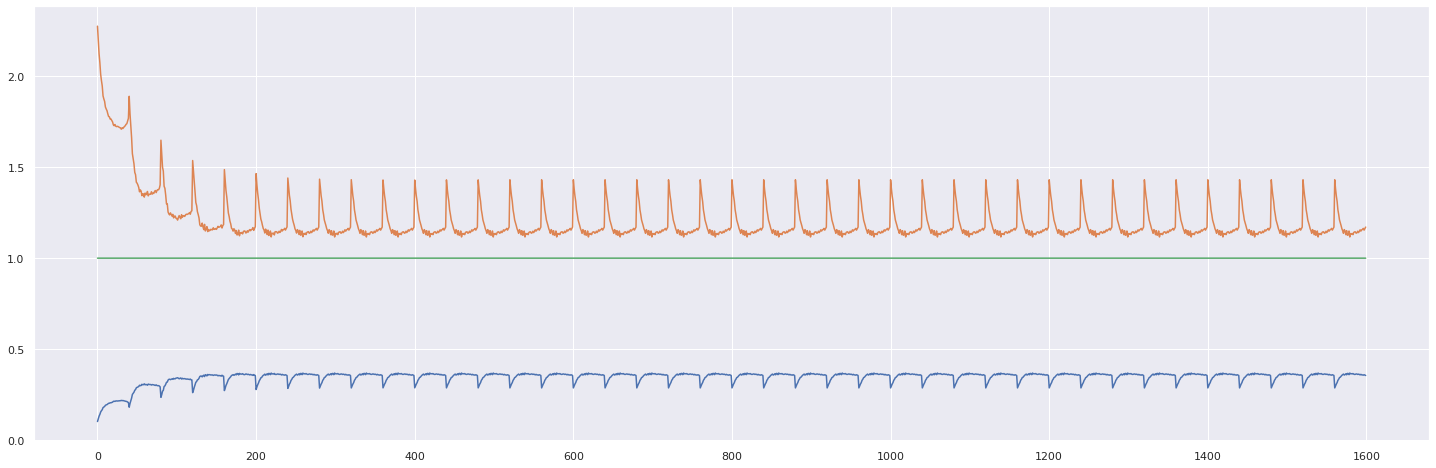

In [47]:
#WITH BOOTSRAP
scoresb = rfgs['mean_test_r2'][:int(len(rfgs['mean_test_r2'])/2)]
scoresbrm = (rfgs['mean_test_neg_mean_squared_error'][:int(len(rfgs['mean_test_r2'])/2)])**2
depthb = rfgs['param_max_depth'][:int(len(rfgs['mean_test_r2'])/2)]
splitb = rfgs['param_min_samples_split'][:int(len(rfgs['mean_test_r2'])/2)]
leafb = rfgs['param_min_samples_leaf'][:int(len(rfgs['mean_test_r2'])/2)]
maxfeatsb = rfgs['param_max_features'][:int(len(rfgs['mean_test_r2'])/2)]

plt.figure(figsize=(25, 8))
plt.plot(scoresb)
plt.plot(scoresbrm)

#plt.plot(depthb)
#plt.plot(maxfeatsb)
#plt.plot(splitb)
plt.plot(leafb)
plt.show()

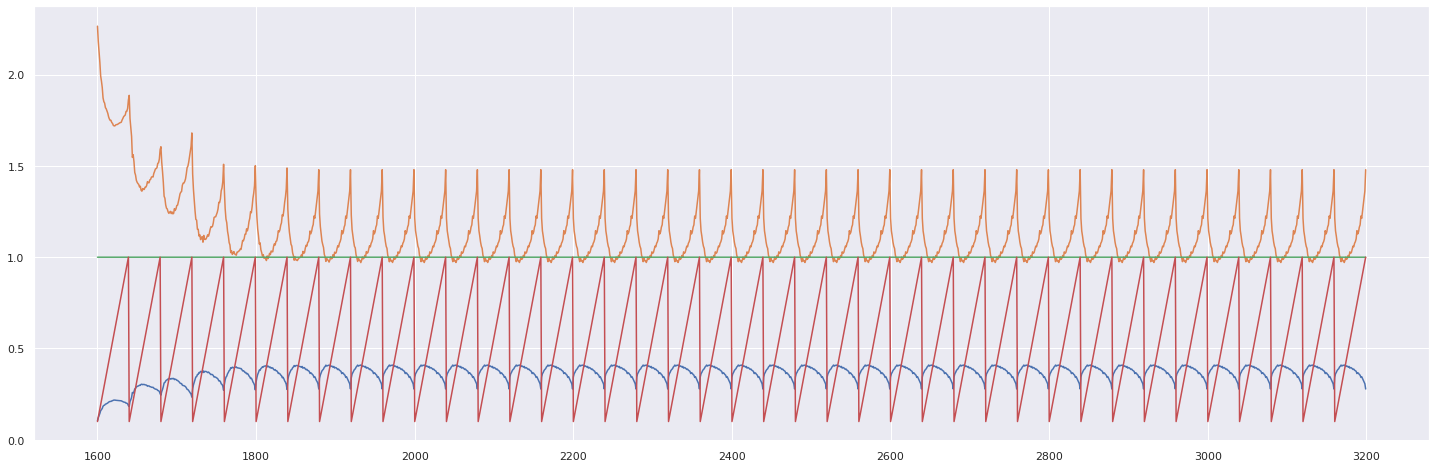

In [53]:
#WITHOUT BOOTSRAP
scores = rfgs['mean_test_r2'][int(len(rfgs['mean_test_r2'])/2):]
scoresrm = (rfgs['mean_test_neg_mean_squared_error'][int(len(rfgs['mean_test_r2'])/2):])**2
depth = rfgs['param_max_depth'][int(len(rfgs['mean_test_r2'])/2):]
split = rfgs['param_min_samples_split'][:int(len(rfgs['mean_test_r2'])/2):]
leaf = rfgs['param_min_samples_leaf'][int(len(rfgs['mean_test_r2'])/2):]
maxfeats = rfgs['param_max_features'][int(len(rfgs['mean_test_r2'])/2):]

plt.figure(figsize=(25, 8))
plt.plot(scores)
plt.plot(scoresrm)
#plt.plot(depth)
#plt.plot(split)
plt.plot(leaf)
plt.plot(maxfeats)
plt.show()

In [6]:
rfgs[['mean_test_r2', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf']]

,mean_test_r2,param_max_depth,param_min_samples_split,param_min_samples_leaf
0,0.103813,1,0.2,1
1,0.119086,1,0.2,1
2,0.133141,1,0.2,1
3,0.142968,1,0.2,1
4,0.155993,1,0.2,1
5,0.163260,1,0.2,1
6,0.168849,1,0.2,1
7,0.180147,1,0.2,1
8,0.183737,1,0.2,1
9,0.186580,1,0.2,1


In [7]:
#PLOT R2
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))





qx = np.array(depthb, dtype='float64')
qy = np.array(splitb, dtype='float64')
qz = np.array(leafb, dtype='float64')

qx=np.unique(qx)
qy=np.unique(qy)
qX, qY = np.meshgrid(qx,qy)

qZ=qz.reshape(len(qy),len(qx))

plt.figure(figsize =(12,9))


plt.pcolormesh(qX,qY,qZ, cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.2, midpoint=0.35))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('${R^2}$ for mean',fontsize=25)
plt.ylabel(r'$\gamma$',fontsize=25)
plt.xlabel('C', fontsize=25)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.show()

ValueError: cannot reshape array of size 3200 into shape (1,40)

In [8]:
#PLOT RMSE
#PLOT R2
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))




qx = np.array(depthb, dtype='float64')
qy = np.array(splitb, dtype='float64')
qz = np.array(leafb, dtype='float64')

qx=np.unique(qx)
qy=np.unique(qy)
qX, qY = np.meshgrid(qx,qy)

qZ=qz.reshape(len(qy),len(qx))

plt.figure(figsize =(12,9))


plt.pcolormesh(qX,qY,qZ, cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.2, midpoint=0.35))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('${R^2}$ for mean',fontsize=25)
plt.ylabel(r'$\gamma$',fontsize=25)
plt.xlabel('C', fontsize=25)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.show()

ValueError: cannot reshape array of size 3200 into shape (1,40)

In [9]:
#3D ANIMATION PLOT


from matplotlib.animation import writers
writers.reset_available_writers()


from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm



qx = np.array(depthb, dtype='float64')
qy = np.array(splitb, dtype='float64')
qz = np.array(leafb, dtype='float64')

qx=np.unique(qx)
qy=np.unique(qy)
qX, qY = np.meshgrid(qx,qy)

qZ=qz.reshape(len(qy),len(qx))


# Create a figure and a 3D Axes
fig = plt.figure()
ax = Axes3D(fig)

def init():
    # Plot the surface.
    ax.plot_surface(qX, qY, qZ, cmap=cm.hot,
                       linewidth=0, antialiased=False)
    return fig,

def animate(i):
    # elevation angle : -180 deg to 180 deg
    ax.view_init(elev=(i-45)*4, azim=10)
    return fig,


# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit=True)




fn = 'rotate_elevation_angle_3d_surf'
#ani.save(fn+'.mp4',writer='pillow',fps=1000/50)
ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)




'''
import subprocess
cmd = 'magick convert %s.gif -fuzz 5%% -layers Optimize %s_r.gif'%(fn,fn)
subprocess.check_output(cmd)
'''

#mpl.rcParams['animation.convert_path'] = 'magick'
plt.rcParams['animation.html'] = 'html5'
ani


from matplotlib.animation import writers
writers.reset_available_writers()
#binpath += r'\magick.exe'

ValueError: cannot reshape array of size 3200 into shape (1,40)

In [ ]:
#3D SURF PLOT - R2


qx = np.array(depthb, dtype='float64')
qy = np.array(splitb, dtype='float64')
qz = np.array(leafb, dtype='float64')



# We are going to do 20 plots, for 20 different angles
for angle in range(20,230,2):

    #INIT
    fig = plt.figure(figsize =(18,12))
    ax = fig.gca(projection='3d')

    ax.scatter(qx, qy, qz, linewidth=0.01, cmap=plt.cm.viridis)
    #plt.show()



    # Set the angle of the camera
    ax.view_init(30,angle)

    # Save it
    filename='./animations/rf/test'+str(angle)+'.png'
    plt.savefig(filename, dpi=150)
    plt.gca()
    '''
    Then use GIMP to transform all the png files into an GIF file.
    '''

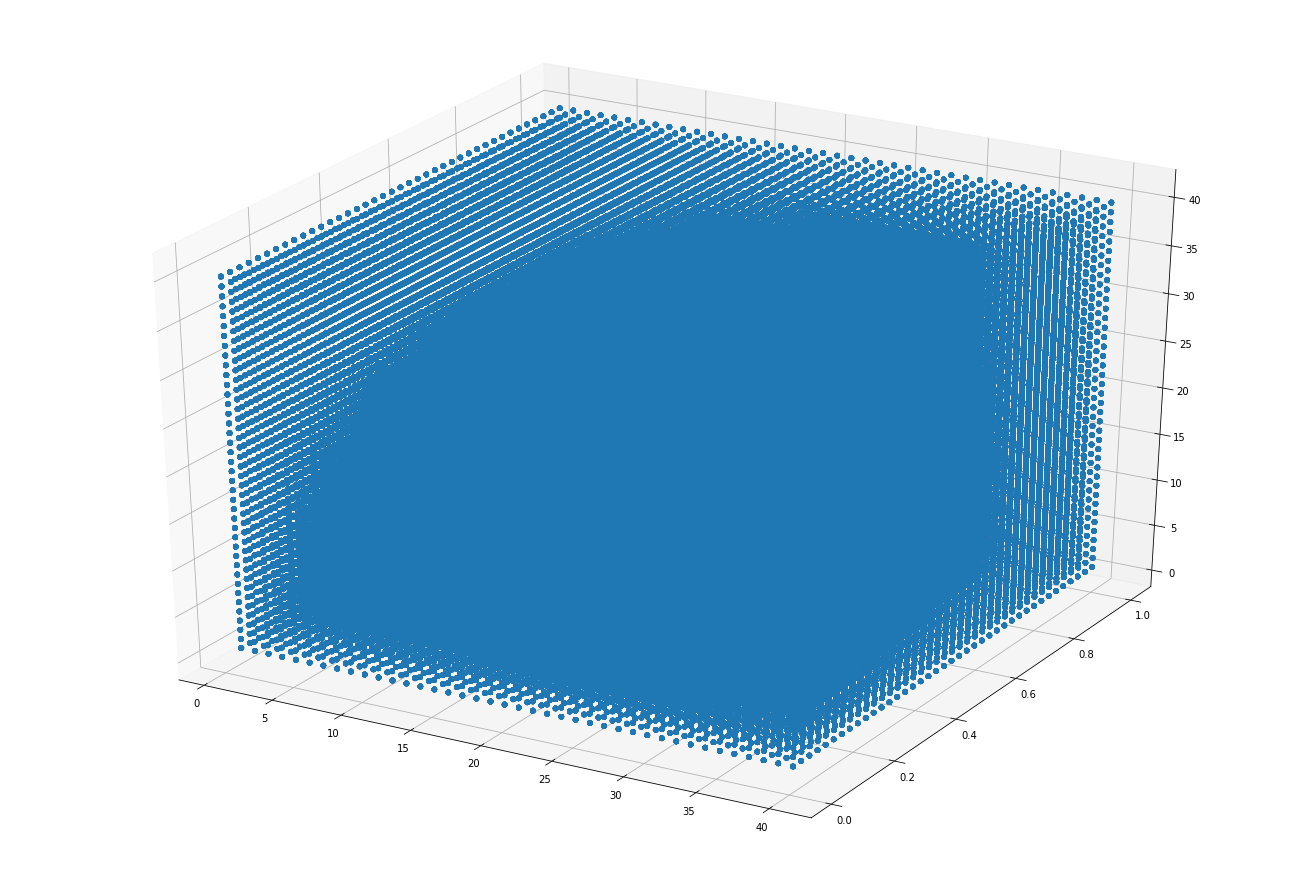

In [85]:
#3D SURF PLOT - RMSE


qx = np.array(depth, dtype='float64')
qy = np.array(split, dtype='float64')
qz = np.array(leaf, dtype='float64')
fig = plt.figure(figsize =(18,12))
ax = Axes3D(fig)

ax.scatter(qx, qy, qz)
plt.show()

In [ ]:
#X-Y RANDOMIZATIONS

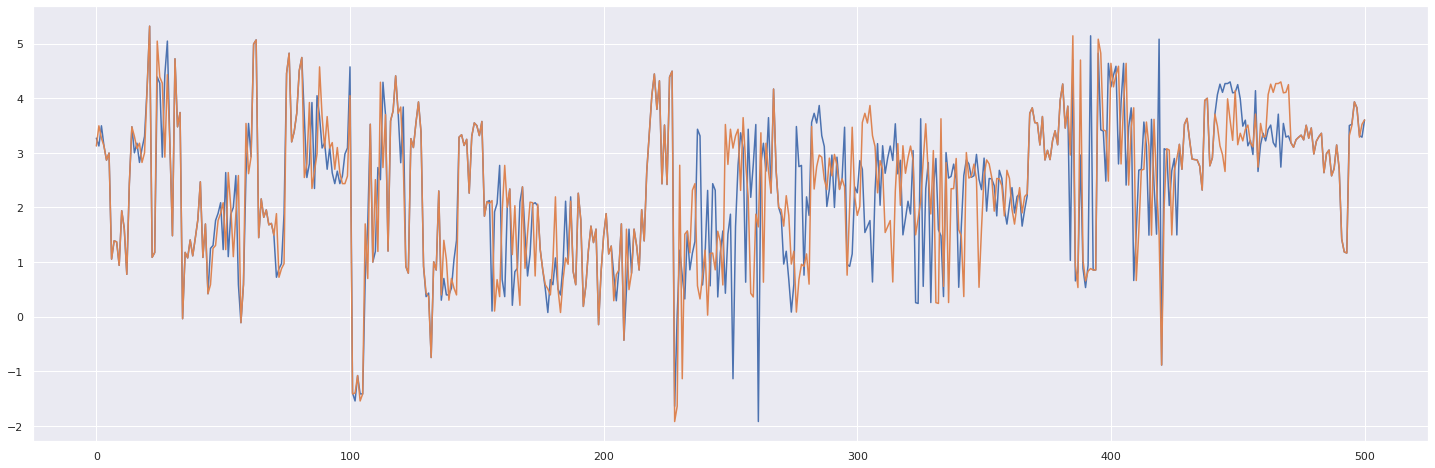

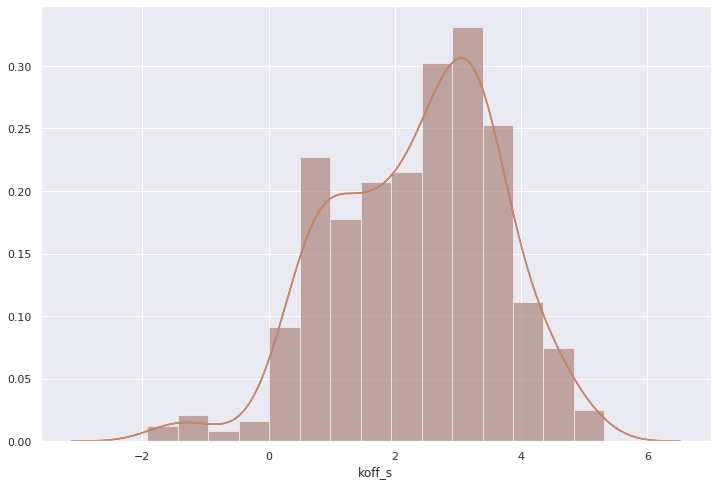

In [815]:
#DIFF BETWEEN Y AND KOFFS ORDER IN CSV - FYI
poop = pd.read_csv('index_all.csv')
plt.figure(figsize=(25, 8))
plt.plot((-np.log10(poop['koff_s'])))
plt.plot(y)
plt.show()
plt.figure(figsize=(12, 8))
sns.distplot((-np.log10(poop['koff_s'])))
sns.distplot(y)
plt.show()


In [ ]:
#20 PERCENT FOR THE TEST SET
ctvals = []
for i in Counter(poop['target']).values():
    ctvals.append(i)
    
ctkeys = []
for i in Counter(poop['target']).keys():
    ctkeys.append(i)

twenty = dict(zip(ctkeys, np.around(np.array(ctvals)*0.2)))
twenty